# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Dataset-and-Preprocessing" data-toc-modified-id="Dataset-and-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset and Preprocessing</a></div><div class="lev2 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev1 toc-item"><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></div><div class="lev1 toc-item"><a href="#Optimizing-hyperparameters-using-multiple-districts" data-toc-modified-id="Optimizing-hyperparameters-using-multiple-districts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Optimizing hyperparameters using multiple districts</a></div><div class="lev1 toc-item"><a href="#Fitting-2GP-model" data-toc-modified-id="Fitting-2GP-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting 2GP model</a></div><div class="lev2 toc-item"><a href="#subset-of-districts" data-toc-modified-id="subset-of-districts-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>subset of districts</a></div><div class="lev2 toc-item"><a href="#Get-posterior-mean-beta-using-multiple-districts" data-toc-modified-id="Get-posterior-mean-beta-using-multiple-districts-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Get posterior mean $\beta$ using multiple districts</a></div><div class="lev2 toc-item"><a href="#Fit-residuals-with-new-hat\beta-and-hyperparameters" data-toc-modified-id="Fit-residuals-with-new-hat\beta-and-hyperparameters-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fit residuals with new $\hat\beta$ and hyperparameters</a></div><div class="lev2 toc-item"><a href="#cliff-face-(multi)" data-toc-modified-id="cliff-face-(multi)-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>cliff-face (multi)</a></div><div class="lev2 toc-item"><a href="#surface-plot-(multi)" data-toc-modified-id="surface-plot-(multi)-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>surface plot (multi)</a></div><div class="lev1 toc-item"><a href="#Average-treatment-effect-(multi)" data-toc-modified-id="Average-treatment-effect-(multi)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Average treatment effect (multi)</a></div><div class="lev2 toc-item"><a href="#Unweighted-mean-treatment-effect-(multi)" data-toc-modified-id="Unweighted-mean-treatment-effect-(multi)-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Unweighted mean treatment effect (multi)</a></div><div class="lev2 toc-item"><a href="#Finite-population-method-(multi)" data-toc-modified-id="Finite-population-method-(multi)-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Finite-population method (multi)</a></div><div class="lev2 toc-item"><a href="#Inverse-variance" data-toc-modified-id="Inverse-variance-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Inverse variance</a></div><div class="lev2 toc-item"><a href="#Geographic-projection-estimator-(multi)" data-toc-modified-id="Geographic-projection-estimator-(multi)-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Geographic projection estimator (multi)</a></div><div class="lev2 toc-item"><a href="#Population-density" data-toc-modified-id="Population-density-55"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Population density</a></div><div class="lev2 toc-item"><a href="#Tables-of-Estimates" data-toc-modified-id="Tables-of-Estimates-56"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Tables of Estimates</a></div><div class="lev1 toc-item"><a href="#Significance-Tests" data-toc-modified-id="Significance-Tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Significance Tests</a></div><div class="lev2 toc-item"><a href="#chi^2-bootstrap-test" data-toc-modified-id="chi^2-bootstrap-test-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>$\chi^2$ bootstrap test</a></div><div class="lev2 toc-item"><a href="#mll-bootstrap-test" data-toc-modified-id="mll-bootstrap-test-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>mll bootstrap test</a></div><div class="lev2 toc-item"><a href="#inv-var-test" data-toc-modified-id="inv-var-test-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>inv-var test</a></div><div class="lev2 toc-item"><a href="#Placebos-(multi)" data-toc-modified-id="Placebos-(multi)-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Placebos (multi)</a></div><div class="lev3 toc-item"><a href="#plot-3x2" data-toc-modified-id="plot-3x2-641"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>plot 3x2</a></div><div class="lev2 toc-item"><a href="#Pairwise-treatment-effect-(multi)" data-toc-modified-id="Pairwise-treatment-effect-(multi)-65"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Pairwise treatment effect (multi)</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\V}{\mathbb{V}}
    \DeclareMathOperator{\cov}{Cov}
    \DeclareMathOperator{\var}{Var}
    \DeclareMathOperator{\ones}{\mathbf{1}}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \newcommand{\boxleft}{\unicode{x25E7}}
    \newcommand{\boxright}{\unicode{x25E8}}
    \newcommand{\discont}{\unicode{x25EB}}
    \newcommand{\jleft}{\unicode{x21E5}}
    \newcommand{\jright}{\unicode{x21E4}}
    \DeclareMathOperator*{\gp}{\mathcal{GP}}
    \newcommand{\trans}{^{\intercal}}
    \newcommand{\scrS}{\mathscr{S}}
    \newcommand{\sigmaf}{\sigma_{\mathrm{GP}}}
    \newcommand{\sigman}{\sigma_{\epsilon}}
    \newcommand{\sigmatau}{\sigma_{\tau}}
    \newcommand{\sigmabeta}{\sigma_{\beta}}
    \newcommand{\sigmamu}{\sigma_{\mu}}
    \newcommand{\sigmagamma}{\sigma_{\gamma}}
    \newcommand{\svec}{\mathbf{s}}
    \newcommand{\vvec}{\mathbf{v}}
    \newcommand{\yvec}{\mathbf{y}}
    \newcommand{\muvec}{\mathbf{\mu}}
    \newcommand{\indep}{\perp}
    \newcommand{\iid}{iid}
    \newcommand{\vectreat}{\Ind_{T}}
    \newcommand{\yt}{Y^\mathrm{T}}
    \newcommand{\yc}{Y^\mathrm{C}}
    \newcommand{\boundary}{\mathcal{B}}
    \newcommand{\sentinels}{\mathbf{b}}
    \newcommand{\eye}{\mathbf{I}}
    \newcommand{\K}{\mathbf{K}}
    \DeclareMathOperator{\trace}{trace}
    \newcommand{\tauw}{\tau^{w}}
    \newcommand{\unifavg}{\tau^{\mathrm{UNIF}}}
    \newcommand{\invvar}{\tau^{\mathrm{INV}}}
    \newcommand{\taurho}{\tau^{\rho}}
    \newcommand{\tauproj}{\tau^{\mathrm{PROJ}}}
    \newcommand{\taugeo}{\tau^{\mathrm{GEO}}}
    \newcommand{\taupop}{\tau^{\mathrm{POP}}}
    \newcommand{\modnull}{\mathscr{M}_0}
    \newcommand{\modalt}{\mathscr{M}_1}
    \newcommand{\degree}{\hspace{0pt}^\circ}
    % NYC %
    \newcommand{\saleprice}{\mathtt{SalePrice}}
    \newcommand{\sqft}{\mathtt{SQFT}}
    \newcommand{\xvec}{\mathbf{x}}
    \newcommand{\dvec}{\mathbf{d}}
    \newcommand{\tax}{\mathtt{TaxClass}}
    \newcommand{\building}{\mathtt{BuildingClass}}
    \newcommand{\district}{\mathtt{District}}
    \newcommand{\eqlabel}[1]{\label{#1}}
    %\renewcommand{\eqref}[1]{(\verbß#1ß)}
    \DeclareMathOperator{\proj}{proj}
    \DeclareMathOperator{\dif}{d}
    \newcommand{\taubold}{\mathbf{\tau}}
$$

The New York City school district is itself divided into sub-districts. From now on, by “district”, I will be talking about these sub-districts. Residents are guaranteed a slot in a school within their district, but there is some system whereby a child can apply to attend schools outside of the district, which might possibly dampen the treatment effect.

Our goal is to detect discontinuities in the price of housing across the school district boundaries.

In [1]:
using LaTeXStrings
using GaussianProcesses
using GaussianProcesses: grad_slice!, cov!, addcov!, KernelData
import GaussianProcesses: get_params, set_params!, num_params
import GaussianProcesses: distance, optimize!
import GaussianProcesses: Mean, Kernel, grad_stack!, grad_stack
using DataFrames
import PDMats: AbstractPDMat, PDMat
import Base: mean
using Distributions
using Base.LinAlg
using Distances
using GeoJSON
using LibGEOS
using Optim
using GLM
import MultivariateStats
mvst=MultivariateStats

import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
;

In [2]:
using PyCall
PyCall.unshift!(PyVector(pyimport("sys")["path"]), "")
@PyCall.pyimport NYC_prepare_plots
;

In [3]:
include("../src/GeoRDD.jl")


Use "MultiGPCovars{MT,KT1,KT2}(...) where {MT,KT1,KT2}" instead.


GeoRDD

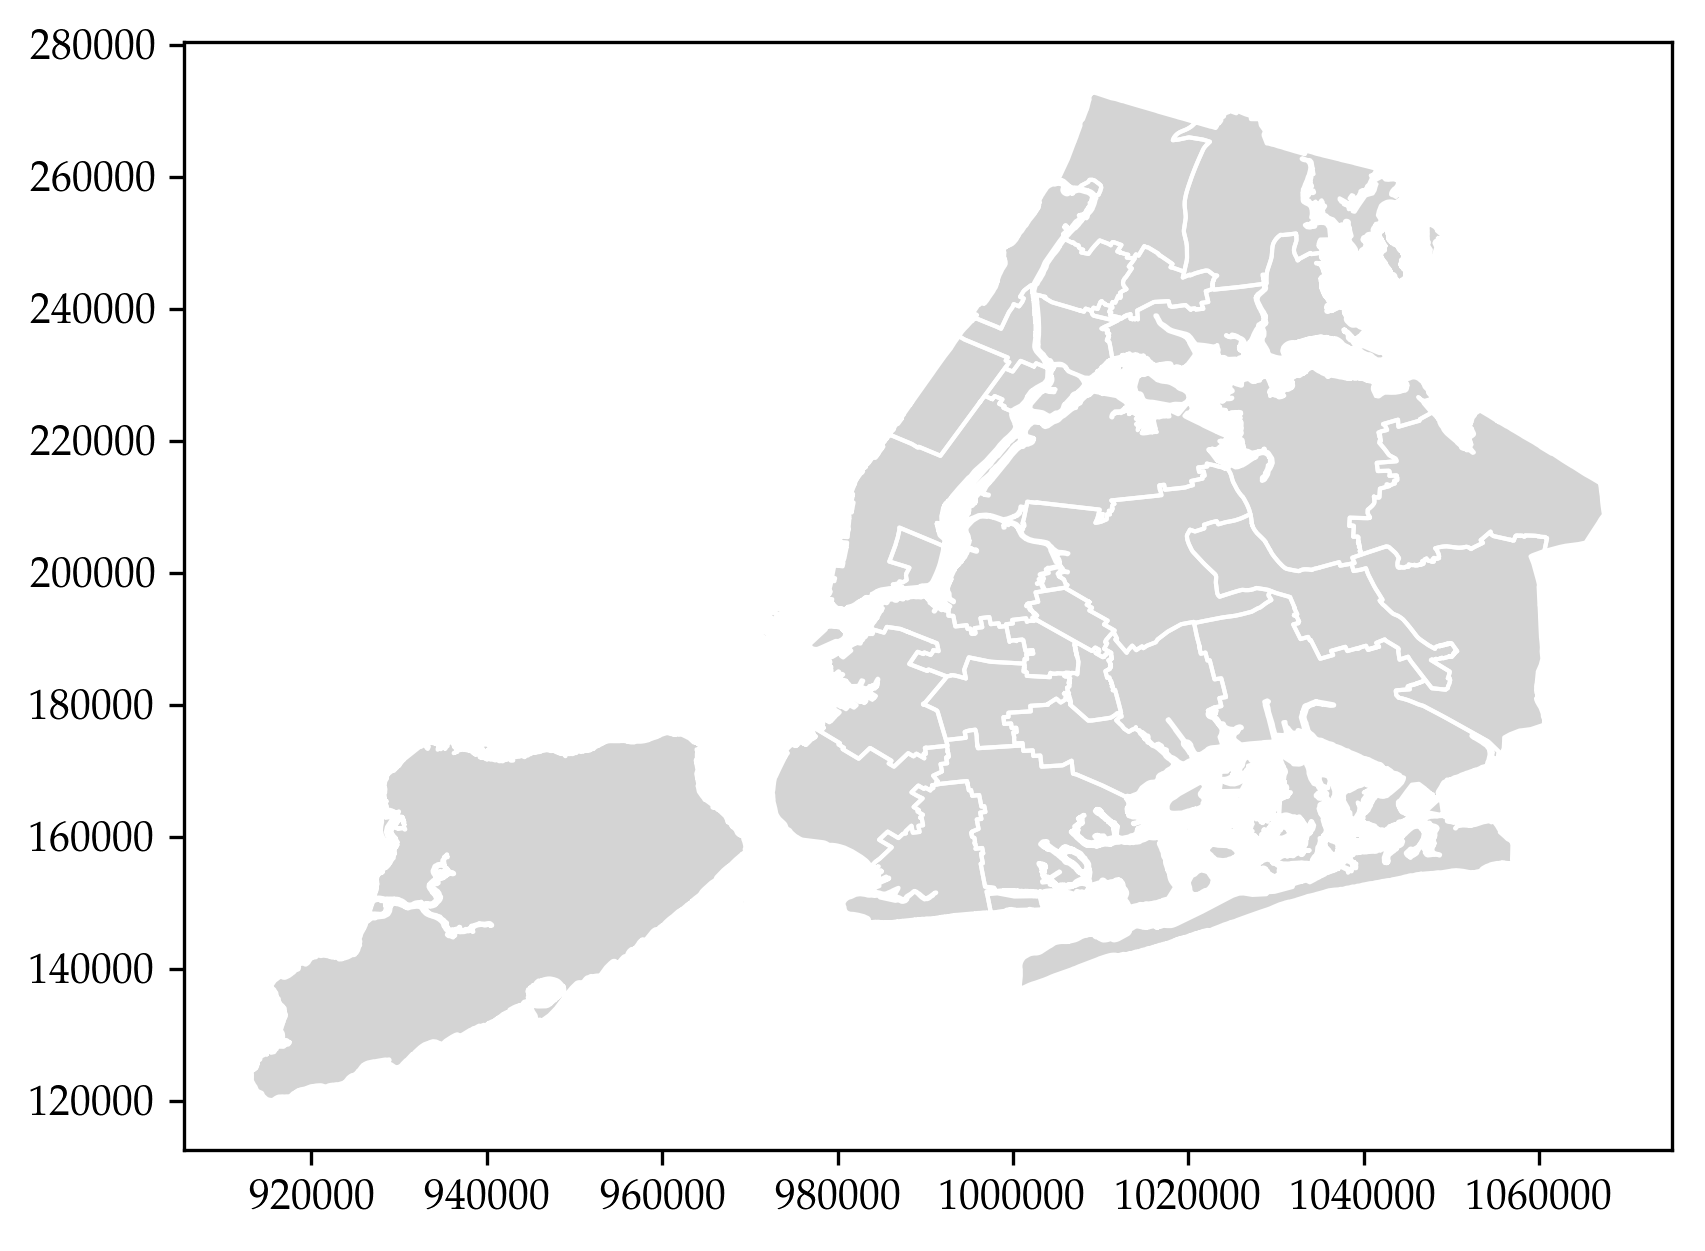

In [4]:
NYC_prepare_plots.background_schdistrs(plt.gca(),
            color="#AAAAAA", 
            edgecolor="white", 
            linestyle="-")
;

# Dataset and Preprocessing

In [5]:
module NYC
    include("NYC.jl")
end

NYC

In [6]:
NYC_sales = NYC.read_processed_sales()

filtered = NYC.filter_sales(NYC_sales)

sentinels = NYC.read_sentinels()

model_dicts = NYC.sales_dicts(filtered[:filtered])
schdistr_indices = model_dicts[:schdistr_indices]
schdistrs = model_dicts[:schdistrs]
X_dict = model_dicts[:X_dict]
Y_dict = model_dicts[:Y_dict]
;

District 01 has 5 sales
District 02 has 85 sales
District 03 has 34 sales
District 04 has 6 sales
District 05 has 39 sales
District 06 has 30 sales
District 07 has 69 sales
District 08 has 739 sales
District 09 has 163 sales
District 10 has 312 sales
District 11 has 1172 sales
District 12 has 204 sales
District 13 has 322 sales
District 14 has 195 sales
District 15 has 517 sales
District 16 has 421 sales
District 17 has 459 sales
District 18 has 559 sales
District 19 has 686 sales
District 20 has 1010 sales
District 21 has 770 sales
District 22 has 1453 sales
District 23 has 245 sales
District 24 has 1283 sales
District 25 has 1317 sales
District 26 has 1268 sales
District 27 has 2199 sales
District 28 has 1033 sales
District 29 has 1956 sales
District 30 has 695 sales
District 31 has 0 sales
District 32 has 345 sales


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] anynull(::NullableArrays.NullableArray{Float64,1}) at ./deprecated.jl:57
 [3] convert(::Type{Array{Float64,2}}, ::DataTables.DataTable) at /Users/imolk/Library/Julia/packages/v0.6/DataTables/src/abstractdatatable/abstractdatatable.jl:545
 [4] setindex!(::Dict{String,Array{Float64,2}}, ::DataTables.DataTable, ::String) at ./dict.jl:420
 [5] sales_dicts(::DataTables.DataTable) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/NYC/NYC.jl:209
 [6] include_string(::String, ::String) at /Users/imolk/bin/julia_v0.6.0_binary/lib/julia/sys.dylib:?
 [7] include_string(::Module, ::String, ::String) at /Users/imolk/Library/Julia/packages/v0.6/Compat/src/Compat.jl:464
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)(

New York publishes a year's worth of house sales on a rolling basis. Annoyingly, this means that data that is older than a year disappears, and I've not been able to find this data online. But New York is a density, so even just a year's data is quite a large dataset.

I also have some covariates, though somewhat less rich than I found in Tucson. What I have is square footage, tax class and [building class](http://nycprop.nyc.gov/nycproperty/help/hlpbldgcode.html). I've geocoded the address of each sale to get a latitude and longitude, and projected the coordinates onto a Euclidean plane in order to be able to calculate distances.

![sales map](NYC_plots/NYC_sales.png)

## Data cleaning

I remove the following sales:

* any sale with missing data in the sale price, square footage, property covariates, geographical coordinates (due to failed geocoding)
* sales outside of any NYC school district
* properties smaller than 100 sq ft
* outliers in the price per sqft, which I defined as sales outside of $3 < Y_i < 8$

I remove tiny properties because I feel like they might behave differently than the rest of the market.
Removing outliers is possibly contentious, but it makes sense to me that some sales between friends or family members could have a very low $Y_i$ that isn't a true representation of the market price, and that some high prices could be equally disconnected from the market.

This leaves {{sum(filtered[:believable])}} out of {{length(filtered[:believable])}} sales records in NYC, mostly because of properties that don't have a reported gross square footage.

# Model

I decided to define the outcome to be the log price per square foot. The model is a Gaussian Process in the spatial covariates on top of a ridge regression on the property covariates (building and tax class). Within a school district we could write the model as [suggestions for clearer notation welcome]:

\begin{align}
    Y_i &= \log\del{ \frac{\saleprice_i}{\sqft_i}} = \beta_0 + \beta_{1\tax\sbr{i}} + \beta_{2\building\sbr{i}} + f(\xvec_i) + \epsilon_i \\
    \epsilon_i &\sim \normal\del{0, \sigma_y^2} \\
    \beta_{1j},\beta_{2j} &\sim \normal\del{0, \sigma_\beta^2} \\
    f(\xvec_i) &\sim \gp\del{0, k(\xvec, \xvec')} \\
    k(\xvec, \xvec') &= \sigma_f^2 \exp\cbr{ - (\xvec-\xvec')\trans(\xvec-\xvec') / 2\ell^2}
\end{align}

A visual inspection of the house sales map above led me to focus on the boundary between districts 19 and 27. I found a map online of average maths performance in each school district, which shows that districts 19 and 27 are quite different. It's important to note that the boundary between the two districts is also part of the boundary between Brooklyn and Queens, so we won't be able to attribute a causal effect solely to the difference in school districts. A histogram of $Y$ in both districts also shows that marginally the house prices are very different.

![districts](NYC_plots/NYC_school_performances_croppped.png)

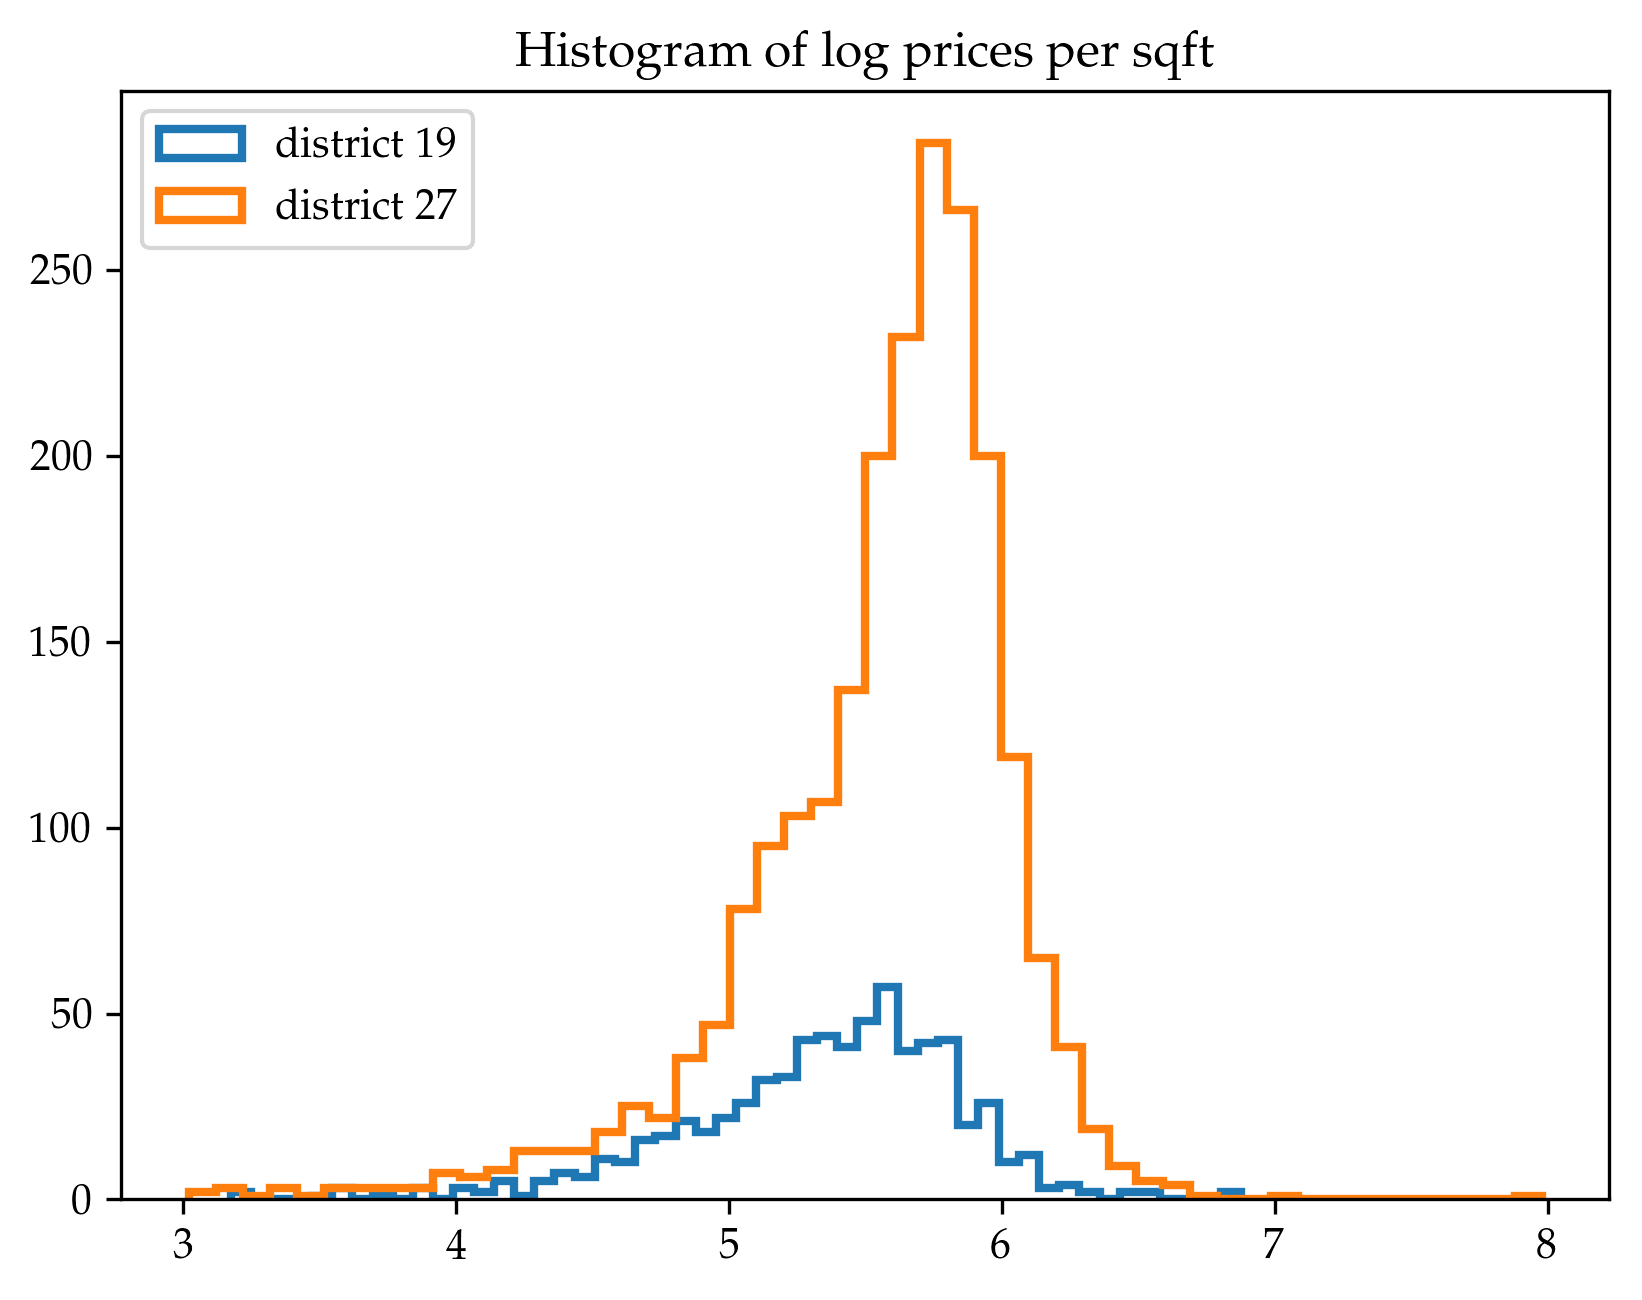

In [9]:
distrA = "19"
distrB = "27"
plt.plt[:hist](Y_dict[distrA],bins=50, histtype="step", label=@sprintf("district %s", distrA), linewidth=2)
plt.plt[:hist](Y_dict[distrB],bins=50, histtype="step", label=@sprintf("district %s", distrB), linewidth=2)
plt.title("Histogram of log prices per sqft")
plt.legend(loc="upper left")
plt.savefig("NYC_plots/sales_histogram_19-27.png")
plt.savefig("NYC_plots/sales_histogram_19-27.pdf")
;

In [10]:
# VERY PAINFUL CONVERSION CODE BECAUSE WE'RE USING
# DataTables AND ONLY DataFrames.jl HAS CODE
# FOR MODEL MATRICES
contrasts_dict = Dict()
BCATOS = filtered[:filtered][NYC.BUILDING_CLASS_AT_TIME_OF_SALE]
TCATOS = filtered[:filtered][NYC.TAX_CLASS_AT_TIME_OF_SALE]
for_mm = DataFrame(
    logSalePricePerSQFT = filtered[:filtered][:logSalePricePerSQFT].values,
    BUILDING_CLASS_AT_TIME_OF_SALE = DataArrays.PooledDataArray(
            DataArrays.RefArray(BCATOS.refs),  # d
            convert(Vector{String}, BCATOS.pool.levels),  # pool
            ),
    TAX_CLASS_AT_TIME_OF_SALE = DataArrays.PooledDataArray(
            DataArrays.RefArray(TCATOS.refs),  # d
            convert(Vector{String}, TCATOS.pool.levels),  # pool
            ),
    )
for_mm[1:10,:]

,logSalePricePerSQFT,BUILDING_CLASS_AT_TIME_OF_SALE,TAX_CLASS_AT_TIME_OF_SALE
1,6.928904507903688,B1,1.0
2,6.504838870596988,D1,2.0
3,7.0862580496737255,A6,1.0
4,6.922680929198812,A6,1.0
5,7.419473511836218,B1,1.0
6,7.733135993451006,A3,1.0
7,7.201512405008218,A8,1.0
8,7.555074394209042,A5,1.0
9,7.161535799758237,A6,1.0
10,7.40376581696299,C3,2.0


In [11]:
for (term,col) in DataFrames.eachcol(for_mm)
    DataFrames.is_categorical(col) || continue
    contrasts_dict[term] = DataFrames.FullDummyCoding()
end

In [12]:
import DataFrames: @formula, ModelMatrix, coefnames

In [13]:
mf=DataFrames.ModelFrame(@formula(logSalePricePerSQFT ~ BUILDING_CLASS_AT_TIME_OF_SALE + TAX_CLASS_AT_TIME_OF_SALE), 
    for_mm, 
    contrasts=contrasts_dict)
mm=ModelMatrix(mf)
p = size(mm,2)
D_=mm.m;
p

25

# Optimizing hyperparameters using multiple districts

In [14]:
GP_dict=Dict{String, GPE}()
k_mgpcv = SEIso(log(2000.0), log(1.0))
for name in schdistrs
    X = X_dict[name]
    if size(X,1)==0
        continue
    end
    Y = Y_dict[name]
    fit = GPE(X', Y, MeanConst(mean(Y)), k_mgpcv, log(1.0))
    GP_dict[name] = fit
end

In [15]:
module MGPCV
    using GaussianProcesses
    using PDMats
    using Optim
    include("../src/multigp_covars.jl")
end


Use "MultiGPCovars{MT,KT1,KT2}(...) where {MT,KT1,KT2}" instead.


MGPCV

# Fitting 2GP model

## subset of districts

The entire dataset is too big to fit with a $\gp$, so let's subset to districts near the boundary we are focusing on.

In [16]:
local_distrs = ["18","19","23","24","25","26","27","28","29"]
local_indices = vcat(collect(schdistr_indices[distr] for distr in local_distrs)...)

βkern_mgpcv = LinIso(log(1.0))
mgpcv=MGPCV.MultiGPCovars(D_[local_indices,:], [GP_dict[distr] for distr in local_distrs], βkern_mgpcv);

In [17]:
mgpcv.nobsv

10546

In [18]:
buf1 = zeros(mgpcv.nobsv, mgpcv.nobsv)
buf2 = zeros(mgpcv.nobsv, mgpcv.nobsv)
;

A single computation of the likelihood takes about 6 seconds, while computing the gradient takes about 30 seconds.

In [19]:
@time MGPCV.update_mll!(mgpcv)

 15.161879 seconds (1.20 M allocations: 61.113 MiB, 2.85% gc time)


-11200.753691583252

In [20]:
@time MGPCV.update_mll_and_dmll!(mgpcv, buf1, buf2, mean=false)

 73.273889 seconds (504.13 k allocations: 27.121 MiB, 0.49% gc time)


4-element Array{Float64,1}:
 -8434.86  
   591.573 
  -477.62  
    15.5551

In [21]:
# takes 1.8 hours for 100 iterations
GeoRDD.set_params!(mgpcv, [-0.91023, 8.63295, -1.31325, 1.88833],
        noise=true,
        kern=true,
        mean=false,
        beta=true
        )
@time opt_output=optimize!(
        mgpcv, 
        noise=true,
        kern=true,
        mean=false,
        beta=true,
        options=Optim.Options(
            show_trace=true,
            iterations=100,
            x_tol=1e-8,
            f_tol=1e-10),
    )

Iter     Function value   Gradient norm 
     0     5.574828e+03     2.335712e-02
     1     5.574828e+03     4.165326e-02
268.500886 seconds (1.31 M allocations: 1.728 GiB, 0.03% gc time)


Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [-0.91023,8.63295,-1.31325,1.88833]
 * Minimizer: [-0.9102272919308154,8.63295479822668, ...]
 * Minimum: 5.574828e+03
 * Iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-08: false 
     |x - x'| = 4.80e-06 
   * |f(x) - f(x')| / |f(x)| < 1.0e-10: true
     |f(x) - f(x')| / |f(x)| = 1.35e-11 
   * |g(x)| < 1.0e-08: false 
     |g(x)| = 4.17e-02 
   * stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 3
 * Gradient Calls: 3

In [22]:
print(GeoRDD.get_params(mgpcv; mean=false))

[-0.910227, 8.63295, -1.31325, 1.88833]

The fitted hyperparameters are:

| Parameter      | Fitted Value                             |
|----------------|------------------------------------------|
| $\sigma_y$     | {{@sprintf("%.4f", exp(mgpcv.logNoise))}} |
| $\sigma_f$     | {{@sprintf("%.4f", √(mgpcv.k.σ2))}}        |
| $\sigma_\beta$ | {{@sprintf("%.4f", 1/√mgpcv.βkern.ℓ2)}}   |
| $\ell$ (feet)   | {{@sprintf("%.4f", √(mgpcv.k.ℓ2))}}       |

In [27]:
@printf("σ_y: %.4f\n", exp(mgpcv.logNoise))
@printf("σ_f: %.4f\n", √(mgpcv.k.σ2))
@printf("σ_β: %.4f\n", 1/√mgpcv.βkern.ℓ2)
@printf("ℓ: %.4f\n", √(mgpcv.k.ℓ2))

σ_y: 0.4024
σ_f: 0.2689
σ_β: 0.1513
ℓ: 5613.6409


It takes a few minutes to fit the hyperparameters. The fitted lengthscale isn't very different: 3700 feet $\approx$ 0.7 miles or 1.1 km. The other hyperparameters are relatively unchanged, which is reassuring.

**Update:** the lengthscale actually seems to have gone up to 5700 feet. I'm not sure what has changed.

## Get posterior mean $\beta$ using multiple districts

In [28]:
@time βhat = MGPCV.postmean_β(mgpcv)
βhat_dict=Dict(zip(coefnames(mf), βhat))

 24

Dict{String,Float64} with 25 entries:
  "BUILDING_CLASS_AT_TIME_OF_SALE: A0" => 0.0861954
  "TAX_CLASS_AT_TIME_OF_SALE: 1.0"     => 0.137329
  "BUILDING_CLASS_AT_TIME_OF_SALE: D6" => 0.0502425
  "BUILDING_CLASS_AT_TIME_OF_SALE: A4" => 0.240295
  "BUILDING_CLASS_AT_TIME_OF_SALE: A1" => 0.0741761
  "BUILDING_CLASS_AT_TIME_OF_SALE: D5" => 0.061656
  "BUILDING_CLASS_AT_TIME_OF_SALE: A2" => -0.0213687
  "BUILDING_CLASS_AT_TIME_OF_SALE: A6" => -0.229784
  "BUILDING_CLASS_AT_TIME_OF_SALE: RA" => -0.0181153
  "BUILDING_CLASS_AT_TIME_OF_SALE: RW" => 0.0
  "BUILDING_CLASS_AT_TIME_OF_SALE: C4" => 0.0
  "BUILDING_CLASS_AT_TIME_OF_SALE: A9" => -0.0245887
  "BUILDING_CLASS_AT_TIME_OF_SALE: A7" => 0.0485625
  "BUILDING_CLASS_AT_TIME_OF_SALE: A5" => -0.100771
  "BUILDING_CLASS_AT_TIME_OF_SALE: C3" => 0.0
  "BUILDING_CLASS_AT_TIME_OF_SALE: D1" => 0.0
  "BUILDING_CLASS_AT_TIME_OF_SALE: D7" => -0.105327
  "BUILDING_CLASS_AT_TIME_OF_SALE: G2" => 0.0
  "BUILDING_CLASS_AT_TIME_OF_SALE: A8" => -0.0965445
  "

.068040 seconds (501.09 k allocations: 1.690 GiB, 0.33% gc time)


In [29]:
writetable("betahat.csv", sort(DataFrame(key=coefnames(mf), val=βhat)))

## Fit residuals with new $\hat\beta$ and hyperparameters

In [30]:
resid = for_mm[:logSalePricePerSQFT] - D_*βhat
resid_dict=Dict{String, Vector{Float64}}()
for name in schdistrs
    resid_dict[name] = resid[schdistr_indices[name]]
end

In [31]:
write("NYC_data/processed/resid_multi.json", JSON.json(resid_dict))

353457

In [32]:
resid_GP_dict_multi=Dict{String, GPE}()
for name in schdistrs
    X = X_dict[name]
    if size(X,1)==0
        continue
    end
    Y = resid_dict[name]
    fit = GPE(X', Y, MeanConst(mean(Y)), mgpcv.k, mgpcv.logNoise)
    resid_GP_dict_multi[name] = fit
end

In [33]:
distrA,distrB="19","27"
resid_μposterior_multi, resid_Σposterior_multi = GeoRDD.cliff_face(
                                        resid_GP_dict_multi[distrA], 
                                        resid_GP_dict_multi[distrB],
                                        hcat(sentinels[distrA,distrB].coordinates...))
;

## cliff-face (multi)

In [34]:
function plot_cliffface(μ, Σ, color; label=L"posterior of $\tau(x)$ on residuals")
    plt.plot(μ, color=color, ".", label=label)
    msize=15
    plt.plot(1,μ[1], color=cbbPalette[5], 
        markersize=msize, marker="o")
    plt.plot(length(μ),μ[end], color=cbbPalette[4], 
        markersize=msize, marker="o")
    plt.plot(μ.+2*sqrt.(diag(Σ)), color=color, linestyle=":")
    plt.plot(μ.-2*sqrt.(diag(Σ)), color=color, linestyle=":")
end

plot_cliffface (generic function with 1 method)

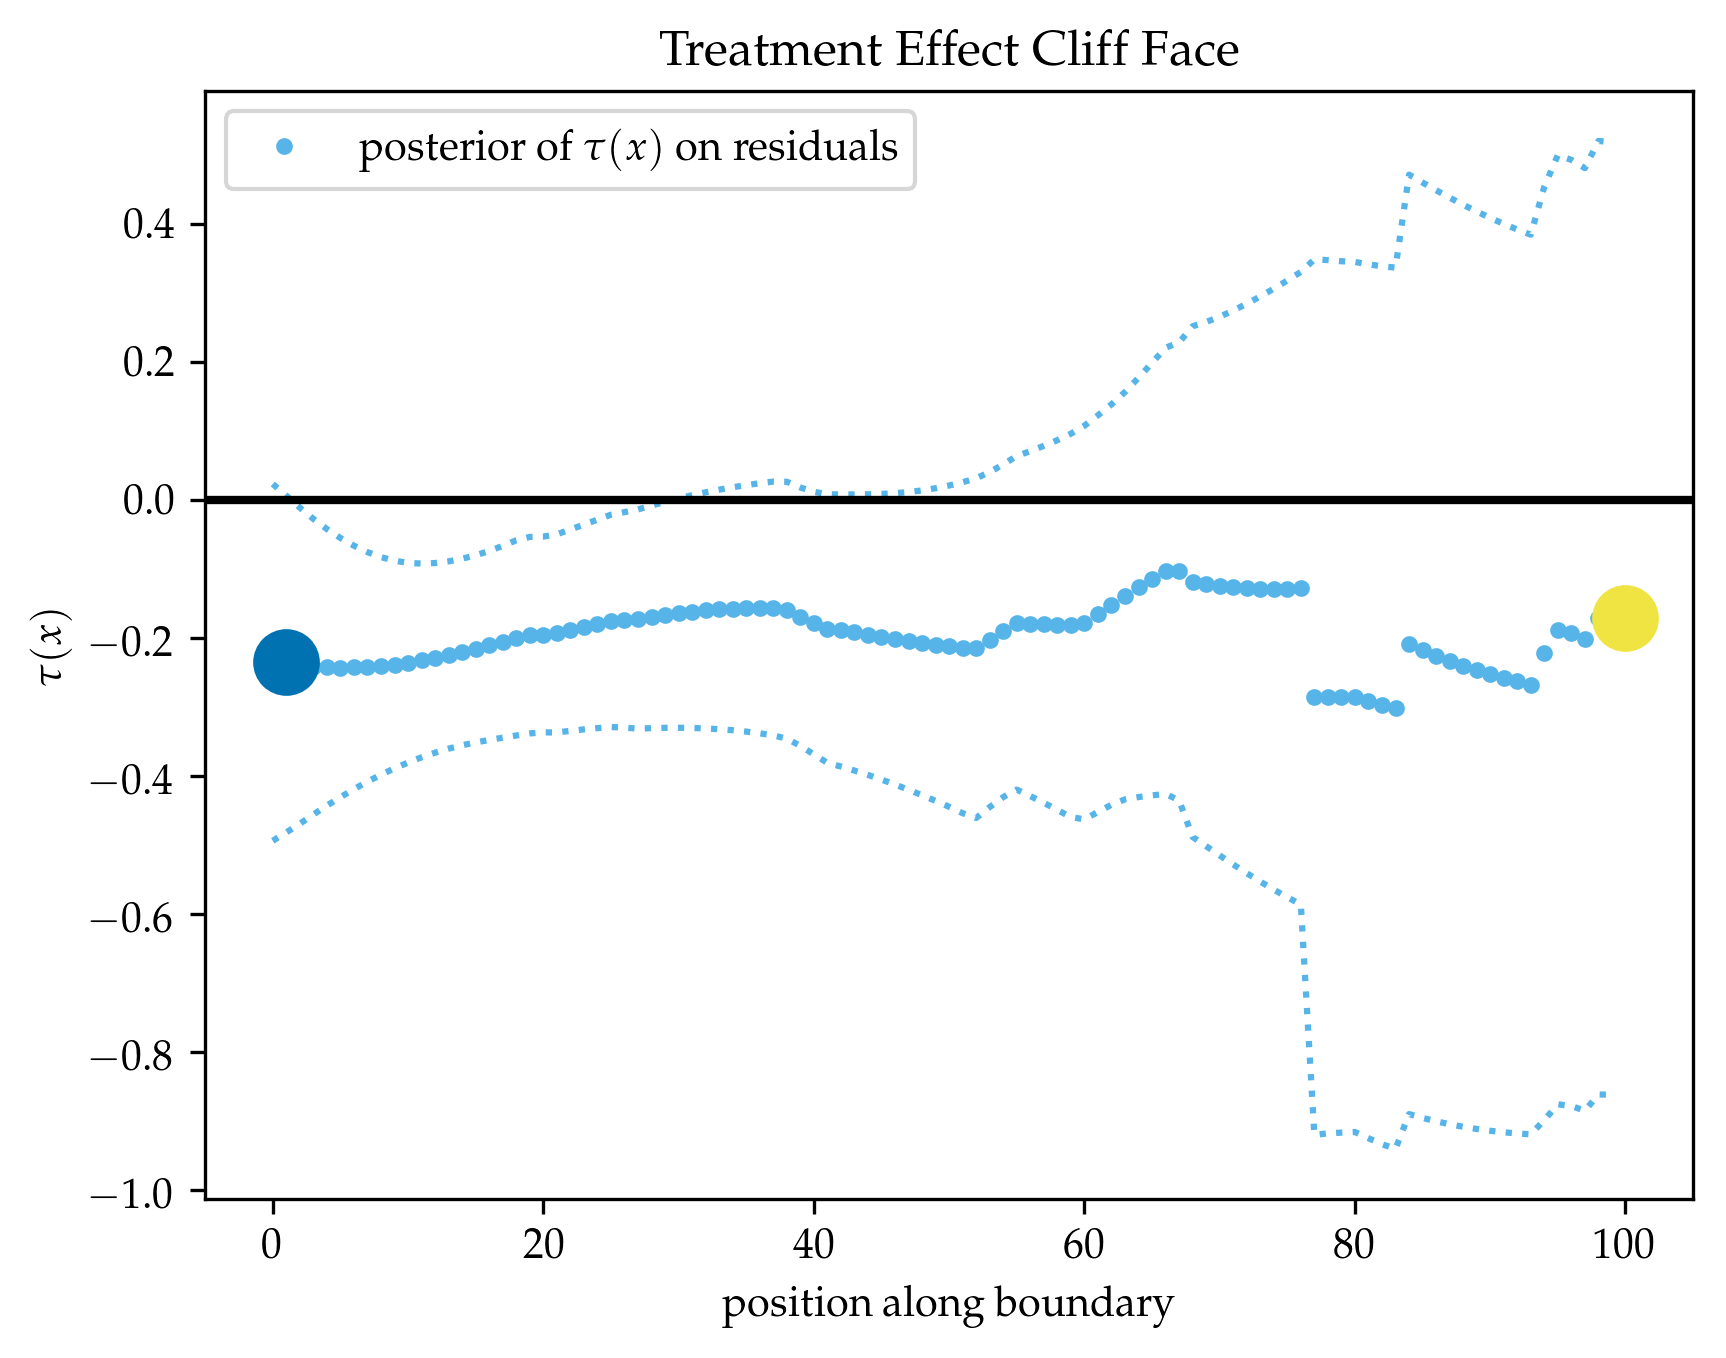

In [35]:
PyPlot.plt[:interactive](true)
plt.title("Treatment Effect Cliff Face")
PyPlot.plt[:interactive](false)
# plot_cliffface(resid_μposterior,resid_Σposterior,cbbPalette[6])
plot_cliffface(resid_μposterior_multi,resid_Σposterior_multi,cbbPalette[2])
plt.axhline(y=0, color="black", linewidth=2)
plt.ylabel(L"\tau(x)")
plt.xlabel("position along boundary")
plt.legend()
PyPlot.plt[:interactive](true)
;

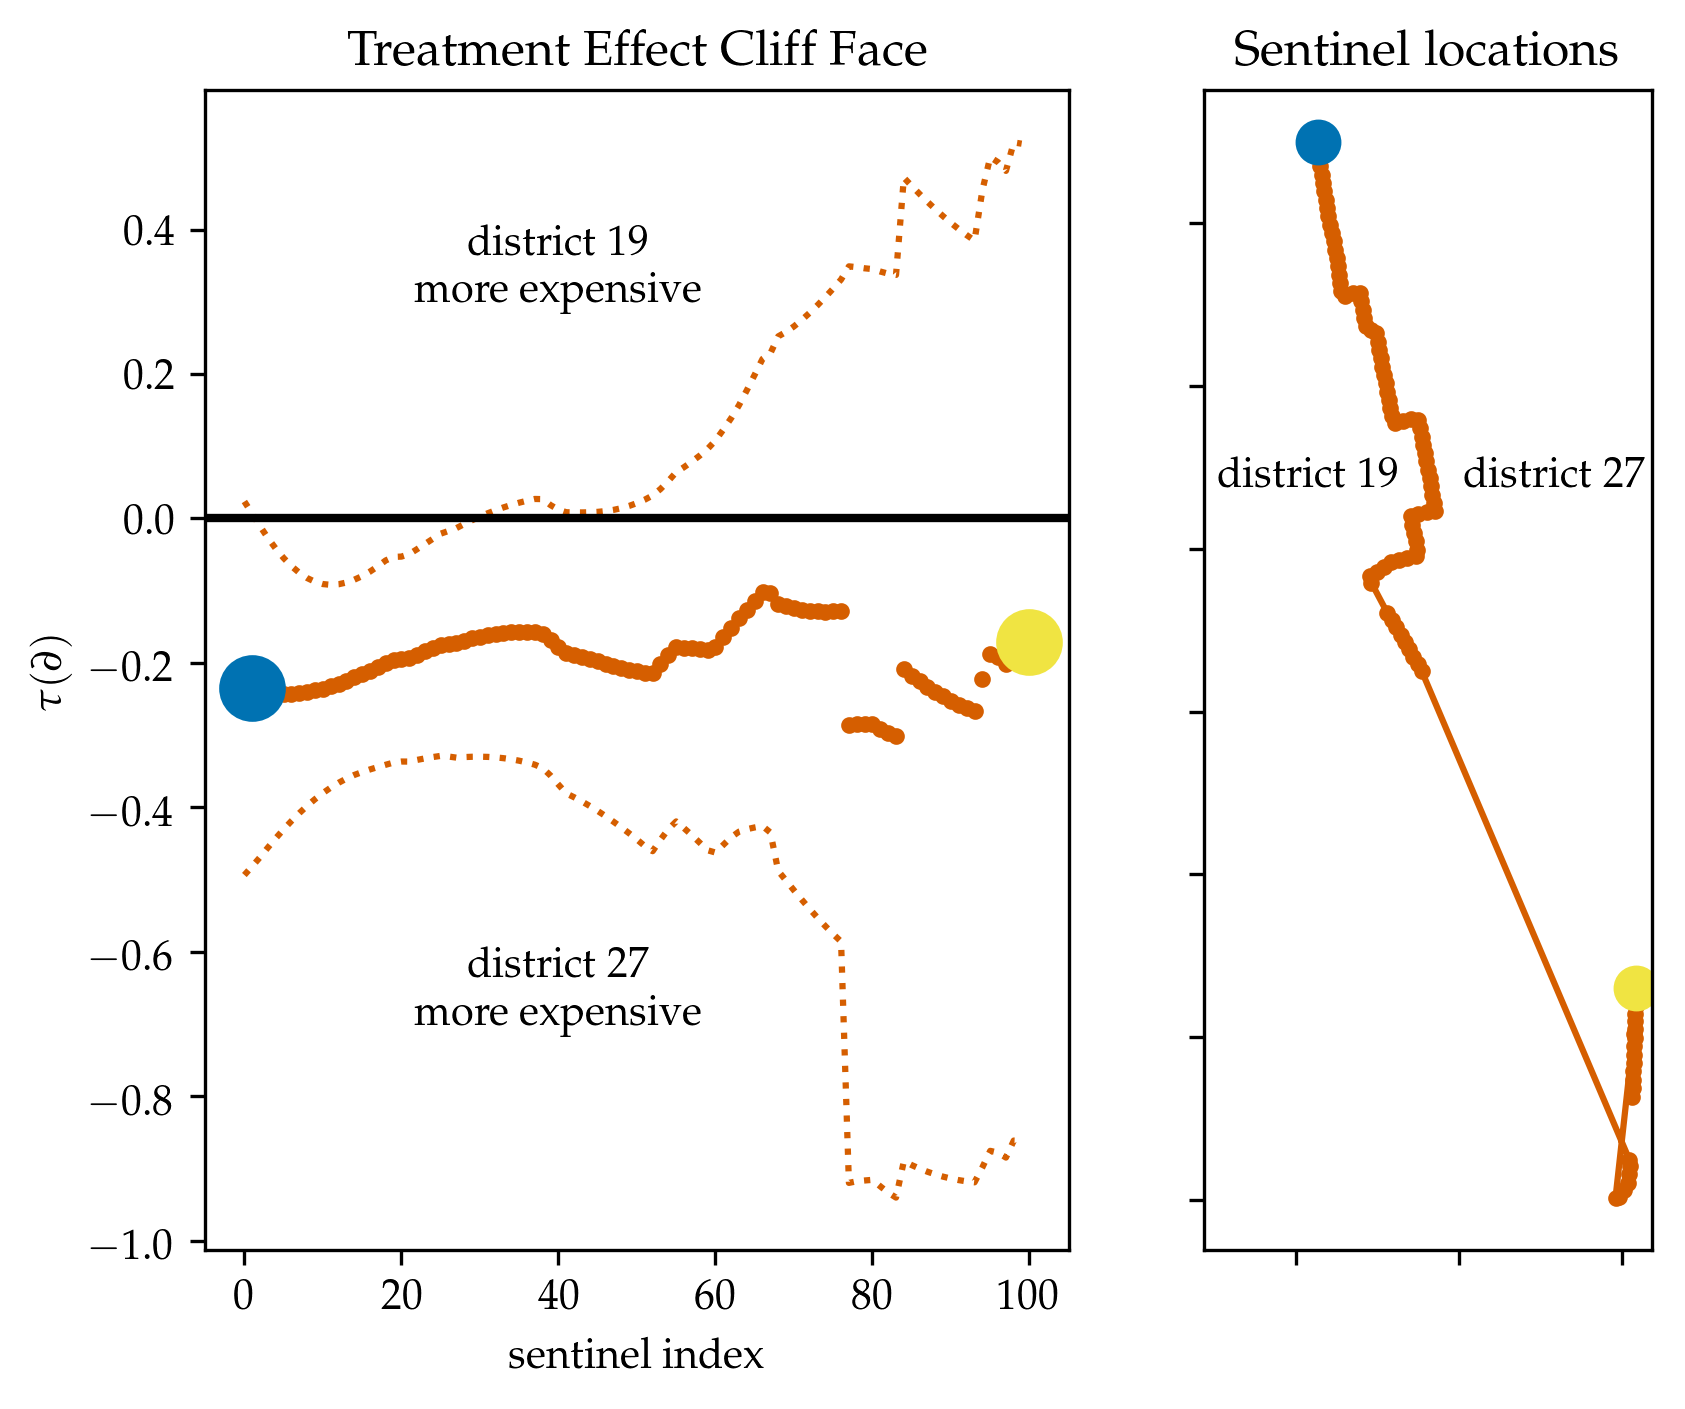

In [36]:
msize=10
PyPlot.plt[:interactive](true)
plt.subplot(1,2,2)
plt.title("Sentinel locations")
PyPlot.plt[:interactive](false)
X◫ = hcat(sentinels[distrA,distrB].coordinates...)
plt.plot(X◫[1,:], X◫[2,:], linestyle="-", marker=".", color=color=cbbPalette[6])
plt.plot(X◫[1,1], X◫[2,1], "o", color=cbbPalette[5], markersize=msize, label="first point")
plt.plot(X◫[1,end], X◫[2,end], "o", color=cbbPalette[4], markersize=msize, label="last point")
plt.text(X◫[1,50]+1000,X◫[2,50], "district 27", horizontalalignment="left")
plt.text(X◫[1,50]-1000,X◫[2,50], "district 19", horizontalalignment="right")
ax = plt.gca()
ax[:set_xticklabels]([])
ax[:set_yticklabels]([])
ax[:set_aspect]("equal")
plt.xlim(plt.xlim()[1]-3000,plt.xlim()[2])
plt.subplot(1,2,1)
plt.title("Treatment Effect Cliff Face")
plot_cliffface(resid_μposterior_multi,resid_Σposterior_multi, cbbPalette[6])
plt.axhline(y=0, color="black", linewidth=2)
plt.text(40, 0.3,  "district 19\nmore expensive", horizontalalignment="center")
plt.text(40, -0.7, "district 27\nmore expensive", horizontalalignment="center")
plt.ylabel(L"\tau(\partial)")
plt.xlabel("sentinel index")
# plt.legend()
plt.tight_layout()
PyPlot.plt[:interactive](true)
plt.savefig("NYC_plots/NYC_cliff_face.png")
;

## surface plot (multi)

In [37]:
function plot_surface3d(gridT, gridC, gpT, gpC, X∂)
    predgridT=GaussianProcesses.predict(gpT, gridT'; full_cov=false)
    predgridC=GaussianProcesses.predict(gpC, gridC'; full_cov=false)
    predT_∂ = GaussianProcesses.predict(gpT, X∂; full_cov=false)
    predC_∂ = GaussianProcesses.predict(gpC, X∂; full_cov=false)
    plot_surface3d(gridT, gridC, predgridT, predgridC, predT_∂, predC_∂, X∂)
end
function plot_surface3d(gridT, gridC, predgridT, predgridC, predT_∂, predC_∂, X∂)
    trisurf_X = [gridT[:,1];gridC[:,1]]
    trisurf_Y = [gridT[:,2];gridC[:,2]]
    trisurf_Z = [predgridT[1];predgridC[1]]
    cutoff_Y = 1.7e5
    trisurf_doplot = trisurf_Y .> cutoff_Y
    min_∂ = min(minimum(predT_∂[1]),minimum(predC_∂[1]))
    max_∂ = max(maximum(predT_∂[1]),maximum(predC_∂[1]))
    plt.plot_trisurf(
        trisurf_X[trisurf_doplot], 
        trisurf_Y[trisurf_doplot], 
        trisurf_Z[trisurf_doplot], 
        linewidth=0, 
        cmap=plt.cm_get_cmap("jet"),
        vmin=minimum(predgridT[1]),
        vmin=min_∂,
        vmax=max_∂,
        )
    plt.plot3D(X∂[1,:], X∂[2,:], predT_∂[1], color=cbbPalette[6], linewidth=3,
        label=L"predicted $g(\partial)$ in district 19")
    plt.plot3D(X∂[1,:], X∂[2,:], predC_∂[1], color=cbbPalette[5], linewidth=3,
        label=L"predicted $g(\partial)$ in district 27")

    plt.text3D(X∂[1,50]+2000,X∂[2,50],predB_∂[1][50],"district 27",horizontalalignment="left")
    plt.text3D(X∂[1,50]-2000,X∂[2,50],predA_∂[1][50],"district 19",
        color="white",fontweight=200,horizontalalignment="right")
    ax=plt.gca()
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.zlabel("log price per sqft")
    plt.legend(loc="best", fontsize="small")
    ax[:view_init](elev=60, azim=230)
    ax[:set_xticklabels]([])
    ax[:set_yticklabels]([])
    plt.xlim(1.01e6, 1.05e6)
    plt.ylim(1.7e5, 1.93e5)
end

plot_surface3d (generic function with 2 methods)

In [38]:
gridA = readcsv(
    @sprintf("NYC_data/processed/SchoolDistrict_grids/SchoolDistrict_grid_%s.csv", distrA), 
    header=false)
gridB = readcsv(
    @sprintf("NYC_data/processed/SchoolDistrict_grids/SchoolDistrict_grid_%s.csv", distrB), 
    header=false)    

gpA = resid_GP_dict_multi[distrA]
gpB = resid_GP_dict_multi[distrB]
Xsent=hcat(sentinels[distrA,distrB].coordinates...)
predgridA=GaussianProcesses.predict_f(gpA, gridA'; full_cov=false)
predgridB=GaussianProcesses.predict_f(gpB, gridB'; full_cov=false)
predA_∂ = GaussianProcesses.predict_f(gpA, Xsent; full_cov=false)
predB_∂ = GaussianProcesses.predict_f(gpB, Xsent; full_cov=false)
;

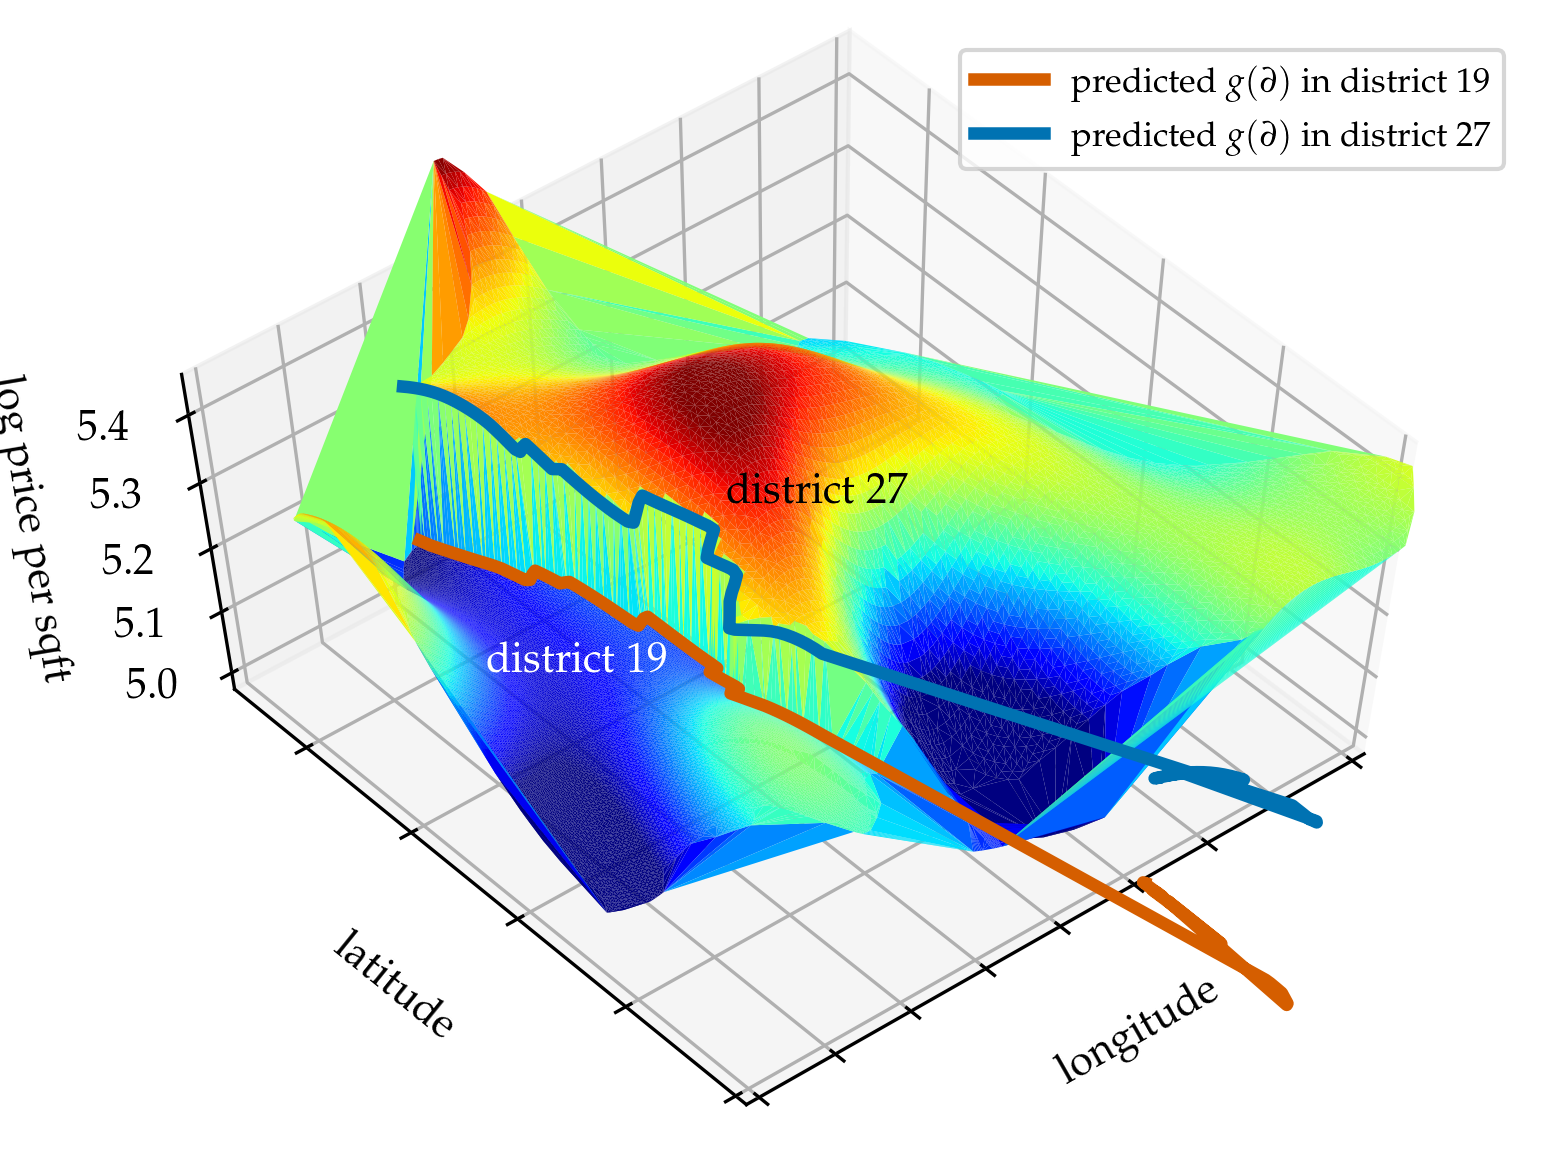

In [39]:
plot_surface3d(gridA, gridB, predgridA, predgridB, predA_∂, predB_∂, Xsent)
plt.savefig("NYC_plots/NYC_surface_plot_multi.png")

# Average treatment effect (multi)

## Unweighted mean treatment effect (multi)

In [40]:
τ_unif=GeoRDD.unweighted_mean(resid_μposterior_multi, resid_Σposterior_multi)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_unif), std(τ_unif))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_unif, 0.0)*100)

τ|Y ∼ Normal(μ=-0.197, σ=0.090)
P(τ>0|Y) = 1.479%

## Finite-population method (multi)

In [41]:
distrA,distrB="19","27"
borders_dict = NYC.read_borders()
border = borders_dict[(parse(distrA), parse(distrB))]
τ_proj = GeoRDD.proj_estimator(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_proj), std(τ_proj))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_proj, 0.0)*100)

τ|Y ∼ Normal(μ=-0.211, σ=0.081)
P(τ>0|Y) = 0.455%

In [42]:
ℓ = sqrt(resid_GP_dict_multi[distrA].k.ℓ2)
τpost_proj = GeoRDD.proj_estimator(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border; 
                                   maxdist=2ℓ)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost_proj), std(τpost_proj))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost_proj, 0.0)*100)

τ|Y ∼ Normal(μ=-0.198, σ=0.061)
P(τ>0|Y) = 0.057%

## Inverse variance

In [43]:
τ_inv=GeoRDD.inverse_variance(resid_μposterior_multi, resid_Σposterior_multi)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_inv), std(τ_inv))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_inv, 0.0)*100)

τ|Y ∼ Normal(μ=-0.199, σ=0.054)
P(τ>0|Y) = 0.013%

## Geographic projection estimator (multi)

In [44]:
schdistr_shape_dict = NYC.read_distr_shapes()
region = LibGEOS.union(schdistr_shape_dict[19], schdistr_shape_dict[27])
ℓ = sqrt(resid_GP_dict_multi[distrA].k.ℓ2)
@time inf_proj_τ = GeoRDD.infinite_proj_estim(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border,
                                   region,
                                   ℓ,
                                   ℓ/10,
                                   )
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(inf_proj_τ), std(inf_proj_τ))
@printf("P(τ>0|Y) = %.3f%%", ccdf(inf_proj_τ, 0.0)*100)

 25.305349 seconds (646.37 k allocations: 74.043 MiB, 0.39% gc time)
τ|Y ∼ Normal(μ=-0.187, σ=0.095)
P(τ>0|Y) = 2.487%

In [45]:
@time τ_geo = GeoRDD.infinite_proj_estim(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border,
                                   region,
                                   ℓ,
                                   ℓ/40,
                                   )
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_geo), std(τ_geo))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_geo, 0.0)*100)

367.401299 seconds (3.56 M allocations: 3.997 GiB, 0.72% gc time)
τ|Y ∼ Normal(μ=-0.187, σ=0.096)
P(τ>0|Y) = 2.537%

With the updated $\hat\beta$ and hyperparameters, the cliff face appears smoother, and the treatment effect stays about the same.

## Population density

In [46]:
using KernelDensity

In [47]:
gp_T = resid_GP_dict_multi[distrA]
gp_C = resid_GP_dict_multi[distrB]
X_both = [gp_T.X gp_C.X]
kde_1927 = kde(X_both')
density_1927 = (s1,s2) -> pdf(kde_1927, s1, s2)

(::#6) (generic function with 1 method)

In [48]:
@time τ_pop = GeoRDD.infinite_proj_estim(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border,
                                   region,
                                   ℓ,
                                   ℓ/10
                                   ;density=density_1927
                                   )
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_pop), std(τ_pop))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_pop, 0.0)*100)

 34.046823 seconds (1.59 M allocations: 1.576 GiB, 1.33% gc time)
τ|Y ∼ Normal(μ=-0.193, σ=0.058)
P(τ>0|Y) = 0.042%

In [49]:
@time τ_pop = GeoRDD.infinite_proj_estim(resid_GP_dict_multi[distrA], 
                                   resid_GP_dict_multi[distrB], 
                                   border,
                                   region,
                                   ℓ,
                                   ℓ/40
                                   ;density=density_1927
                                   )
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τ_pop), std(τ_pop))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τ_pop, 0.0)*100)

434.813611 seconds (7.94 M allocations: 27.587 GiB, 1.78% gc time)
τ|Y ∼ Normal(μ=-0.193, σ=0.058)
P(τ>0|Y) = 0.041%

## Tables of Estimates

In [50]:
labels = [L"\unifavg", L"\invvar", L"\tauproj", L"\taugeo", L"\taupop"]
estimators = [τ_unif, τ_inv, τ_proj, τ_geo, τ_pop]
nyc_estimates = DataTables.DataTable()
nyc_estimates[:estimand] = labels
nyc_estimates[:mean] = [@sprintf("%.2f", mean(est)) for est in estimators]
nyc_estimates[:std] =  [@sprintf("%.2f", std(est)) for est in estimators]
nyc_estimates[:tail] = [@sprintf("%.2f%%", ccdf(est, 0.0)*100) for est in estimators]
nyc_estimates

,estimand,mean,std,tail
1,"L""$\unifavg$""",-0.20,0.09,1.48%
2,"L""$\invvar$""",-0.20,0.05,0.01%
3,"L""$\tauproj$""",-0.21,0.08,0.46%
4,"L""$\taugeo$""",-0.19,0.10,2.54%
5,"L""$\taupop$""",-0.19,0.06,0.04%


In [51]:
print(reprmime("text/latex", nyc_estimates))

\begin{tabular}{r|cccc}
	& estimand & mean & std & tail\\
	\hline
	1 & $\unifavg$ & -0.20 & 0.09 & 1.48\% \\
	2 & $\invvar$ & -0.20 & 0.05 & 0.01\% \\
	3 & $\tauproj$ & -0.21 & 0.08 & 0.46\% \\
	4 & $\taugeo$ & -0.19 & 0.10 & 2.54\% \\
	5 & $\taupop$ & -0.19 & 0.06 & 0.04\% \\
\end{tabular}


# Significance Tests

## $\chi^2$ bootstrap test

In [52]:
distrA = "19"
distrB = "27"
# t=GeoRDD.chistat(resid_GP_dict[distrA], 
#              resid_GP_dict[distrB], 
#              hcat(sentinels[distrA,distrB].coordinates...))
t_multi=GeoRDD.chistat(resid_GP_dict_multi[distrA], 
             resid_GP_dict_multi[distrB], 
             hcat(sentinels[distrA,distrB].coordinates...))

21.651345393969336

In [53]:
@time t_nulls_multi = GeoRDD.nsim_chi(resid_GP_dict_multi[distrA], 
                                resid_GP_dict_multi[distrB], 
                             hcat(sentinels[distrA,distrB].coordinates...),
                             10000;
                             update_mean=true
                             );

197.681556 seconds (1.21 M allocations: 1.715 GiB, 0.55% gc time)


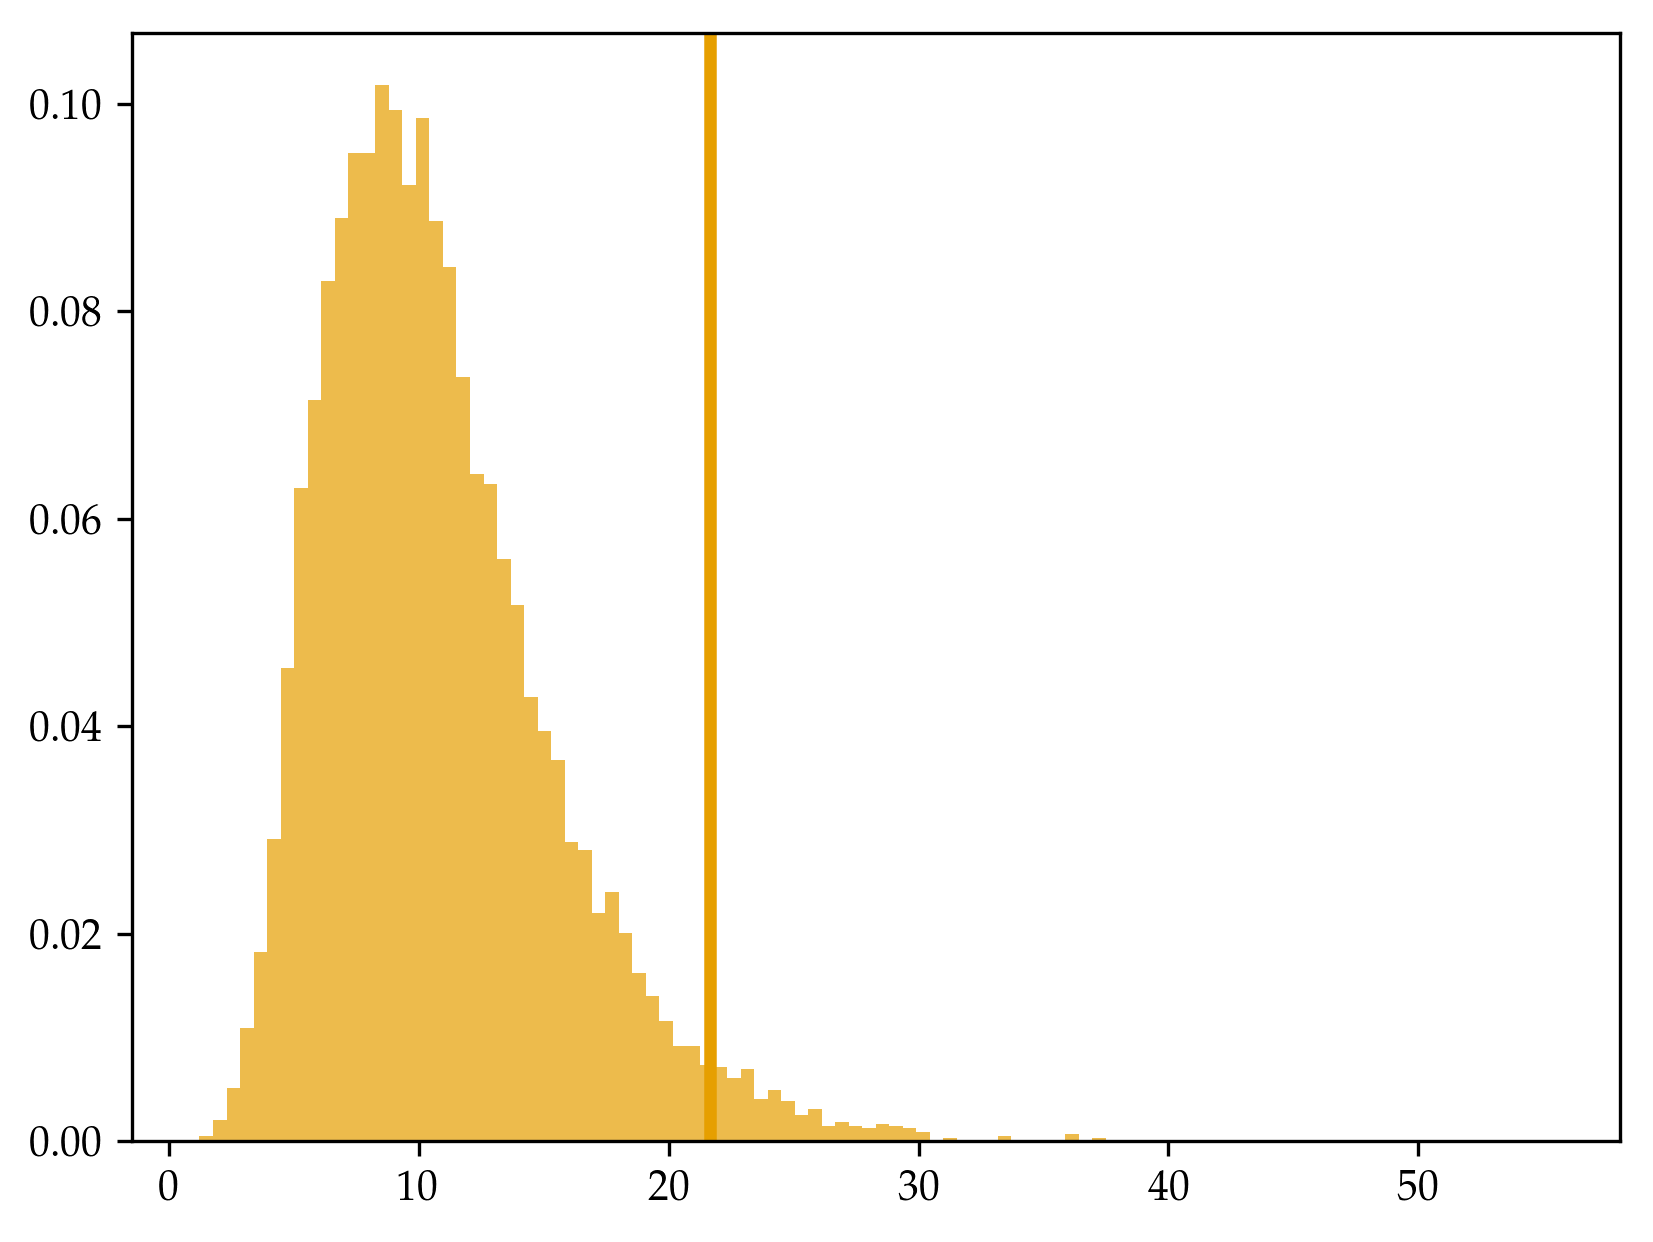

In [54]:
# plt.plt[:hist](t_nulls, normed=true, bins=100, color=cbbPalette[5], alpha=0.7,edgecolor="none")
plt.plt[:hist](t_nulls_multi, normed=true, bins=100, color=cbbPalette[1], alpha=0.7,edgecolor="none")
# plt.axvline(t, color=cbbPalette[5], linewidth=3)
plt.axvline(t_multi, color=cbbPalette[1], linewidth=3)
;

In [55]:
chi2_boot_pval_multi = mean(t_nulls_multi .> t_multi)
@printf("χ2 p-value: %.3f",  chi2_boot_pval_multi)

χ2 p-value: 0.031

## mll bootstrap test

In [56]:
GeoRDD.boot_mlltest(
    resid_GP_dict[distrA],
    resid_GP_dict[distrB],
    10000;
    update_mean=true
)

LoadError: [91mUndefVarError: resid_GP_dict not defined[39m

In [57]:
@time pval_mll_multi = GeoRDD.boot_mlltest(
    resid_GP_dict_multi[distrA],
    resid_GP_dict_multi[distrB],
    10000;
    update_mean=true
)

532.994900 seconds (959.63 k allocations: 3.372 GiB, 0.62% gc time)


0.0022

In [58]:
pval_mll_multi = 0.0015

0.0015

## inv-var test

In [60]:
Xsent=hcat(sentinels[distrA,distrB].coordinates...)
pval_invvar_calib_multi = GeoRDD.pval_invvar_calib(
    resid_GP_dict_multi[distrA],
    resid_GP_dict_multi[distrB],
    Xsent
)

0.0003704594316951994

In [61]:
# uncalibrated
Xsent=hcat(sentinels[distrA,distrB].coordinates...)
GeoRDD.pval_invvar(
    resid_GP_dict_multi[distrA],
    resid_GP_dict_multi[distrB],
    Xsent
)

0.0002511364354381438

## Placebos (multi)

In [129]:
function plot_placebo_pval_hist(pvalA, pvalB, pval_obs; plot_obs=true, label_unif=true)
    bins = linspace(0,1,10)
    plt.plt[:hist](pvalA, bins=bins, linewidth=0, 
        color=cbbPalette[1], label=@sprintf("district %s", distrA), 
        alpha=1.0,
        )
    plt.plt[:hist](pvalB, bins=bins, linewidth=0, 
        color=cbbPalette[2], label=@sprintf("district %s", distrB), 
        alpha=0.7,
        )
    if plot_obs
        plt.axvline(pval_obs, color=cbbPalette[3], label="observed", linewidth=3)
    end
    plt.axhline(length(pvalB)/length(bins), color="#333333", linestyle="--")
    if label_unif
        plt.text(y=length(pvalB)/length(bins) + 0.1, 
                 x=0.02,
                 s="Uniform",
                 color="#333333",
                 horizontalalignment="left",
                 verticalalignment="bottom",
                 rotation=0)
    end
    plt.xlabel("p-value")
    plt.ylabel("Count")
    plt.xlim(0,1)
end
function plot_placebo_pval_horiz_hist(pvalA, pvalB, pval_obs; plot_obs=true, label_unif=true)
    bins = linspace(0,1,10)
    plt.plt[:hist](pvalA, bins=bins, linewidth=0, 
        color=cbbPalette[1], label=@sprintf("district %s", distrA), 
        alpha=1.0,
        orientation="horizontal",
        )
    plt.plt[:hist](pvalB, bins=bins, linewidth=0, 
        color=cbbPalette[2], label=@sprintf("district %s", distrB), 
        alpha=0.7,
        orientation="horizontal"
        )
    if plot_obs
        plt.axhline(pval_obs, color=cbbPalette[3], label="observed", linewidth=3)
    end
    plt.axvline(length(pvalB)/length(bins), color="#333333", linestyle="-")
    if label_unif
        plt.text(x=length(pvalB)/length(bins) + 0.1, 
                 y=0.98,
                 s="Uniform",
                 color="#333333",
                 horizontalalignment="left",
                 verticalalignment="top",
                 rotation=-90)
    end
    plt.ylabel("p-value")
    plt.xlabel("Count")
    plt.ylim(0,1)
end
function plot_placebo_pval_trace(pvalA, pvalB, pval_obs; plot_obs=true)
    plt.plot(1:2:180, pvalA, color=cbbPalette[1], label=@sprintf("district %s", distrA), 
             linewidth=1, marker="p", markersize=4,)
    plt.plot(1:2:180, pvalB, color=cbbPalette[2], label=@sprintf("district %s", distrB), 
             linewidth=1, marker="p", markersize=4)
    if plot_obs
        plt.axhline(pval_obs, color=cbbPalette[3], label="observed", linewidth=3)
    end
    plt.xlabel("Angle (degrees)")
    plt.gca()[:get_xaxis]()[:set_ticks](collect(0:30:180))
    plt.ylabel("p-value")
    plt.ylim(0,1)
end
function plot_placebo_pval(pvalA, pvalB, pval_obs, title)
    plt.subplot(1,2,1)
    plot_placebo_pval_hist(pvalA, pvalB, pval_obs)
    plt.legend(loc="upper right")
    plt.title(title)

    plt.subplot(1,2,2)
    plot_placebo_pval_trace(pvalA, pvalB, pval_obs)
end

plot_placebo_pval (generic function with 1 method)

In [134]:
distrA = "19"
distrB = "27"

"27"

In [135]:
gpA=resid_GP_dict_multi[distrA]
@time placebo_mll_A = [GeoRDD.placebo_mll(angle, 
    gpA.X, 
    gpA.y, 
    gpA.k, 
    gpA.logNoise, 
    1000;
    update_mean=true
    ) 
    for angle in 1.:2.:180.];

130.883754 seconds (7.49 M allocations: 9.918 GiB, 7.76% gc time)


In [136]:
gpB=resid_GP_dict_multi[distrB]
@time placebo_mll_B = [GeoRDD.placebo_mll(angle, 
    gpB.X, 
    gpB.y, 
    gpB.k, 
    gpB.logNoise, 
    1000;
    update_mean=true
    ) 
    for angle in 1.:2.:180.];

1087.116682 seconds (14.94 M allocations: 52.826 GiB, 5.52% gc time)


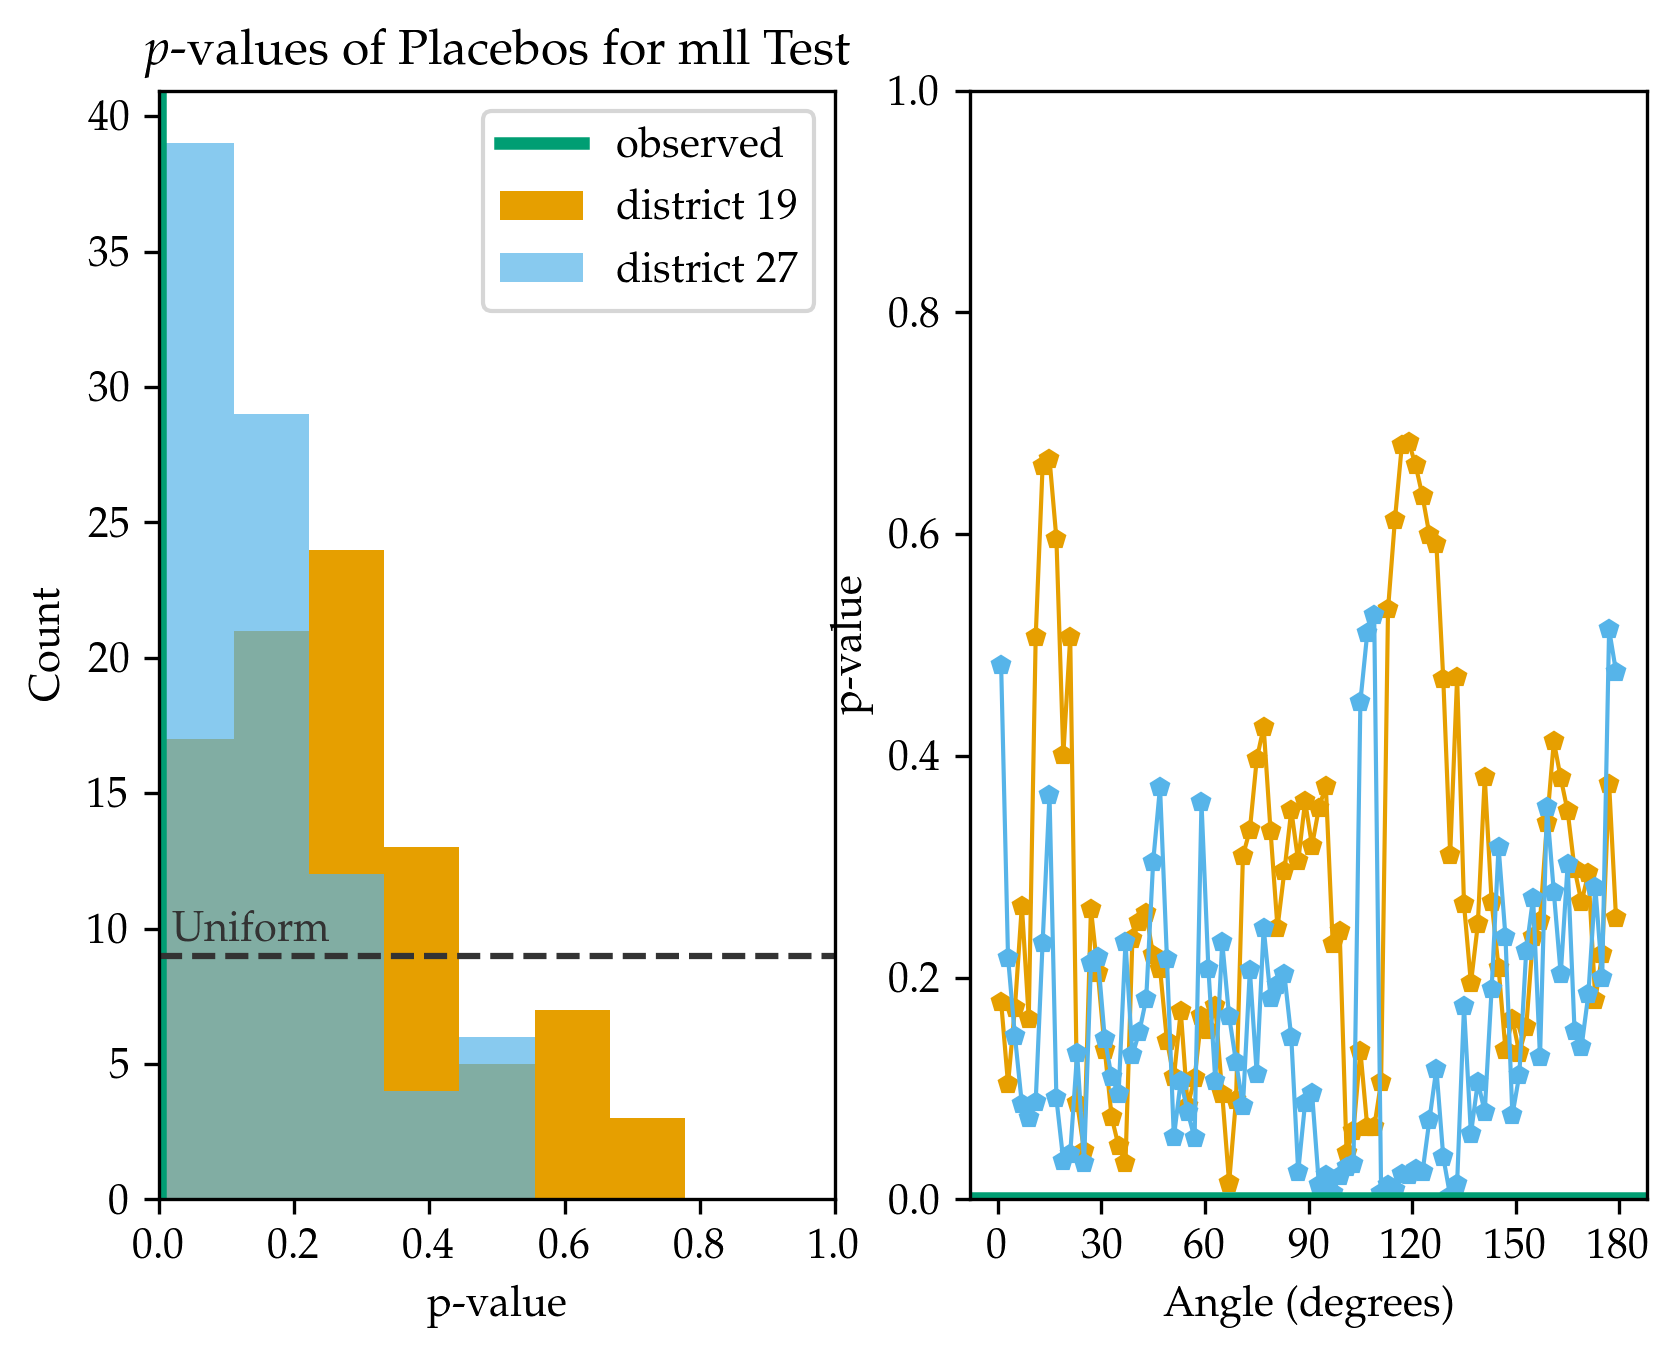

In [137]:
plot_placebo_pval(placebo_mll_A, 
                  placebo_mll_B, 
                    pval_mll_multi, 
    L"$p$-values of Placebos for mll Test")

plt.savefig("NYC_plots/placebo_mll.png")
plt.savefig("NYC_plots/placebo_mll.pdf")
;

In [138]:
@time placebo_chi_A = [GeoRDD.placebo_chi(angle, 
    gpA.X, 
    gpA.y, 
    gpA.k, 
    gpA.logNoise, 
    1000;
    update_mean=true
    ) 
    for angle in 1.:2.:180.];

 76.825692 seconds (4.79 M allocations: 6.379 GiB, 6.86% gc time)


In [139]:
@time placebo_chi_B = [GeoRDD.placebo_chi(angle, 
    gpB.X, 
    gpB.y, 
    gpB.k, 
    gpB.logNoise, 
    1000;
    update_mean=true
    ) 
    for angle in 1.:2.:180.];

487.404489 seconds (11.66 M allocations: 31.194 GiB, 7.95% gc time)


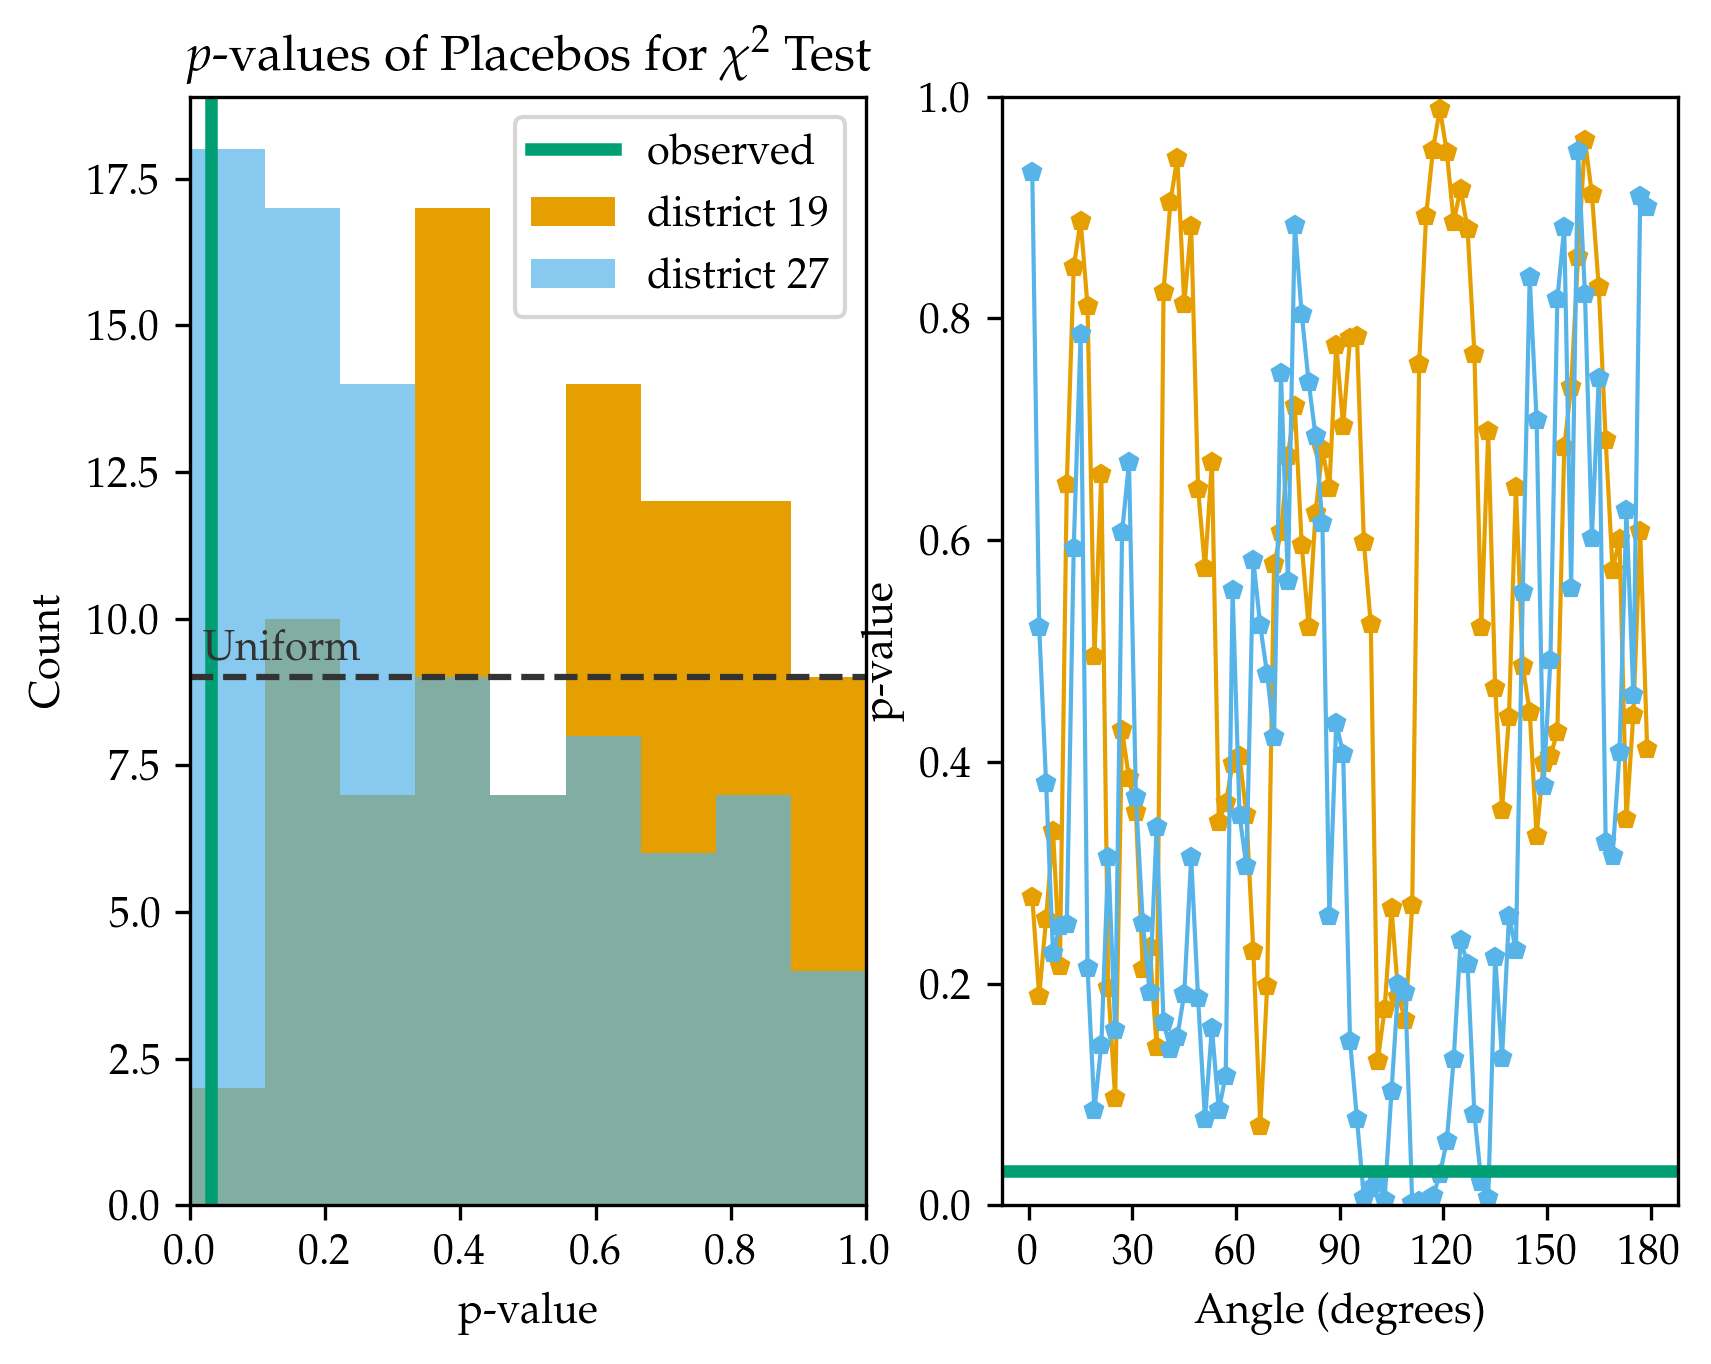

In [140]:
plot_placebo_pval(placebo_chi_A, 
                  placebo_chi_B, 
                    chi2_boot_pval_multi, 
    L"$p$-values of Placebos for $\chi^{2}$ Test")

plt.savefig("NYC_plots/placebo_chi.png")
plt.savefig("NYC_plots/placebo_chi.pdf")
;

In [141]:
@time placebo_invvar_A = [GeoRDD.placebo_invvar(angle, 
    gpA.X, 
    gpA.y, 
    gpA.k, 
    gpA.logNoise)
    for angle in 1.:2.:180.];

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::Array{Bool,1}) at ./deprecated.jl:57
 [3] placebo_invvar(::Float64, ::Array{Float64,2}, ::Array{Float64,1}, ::GaussianProcesses.SEIso, ::Float64) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/src/boot_invvar_test.jl:184
 [4] collect(::Base.Generator{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},##62#63}) at ./array.jl:441
 [5] include_string(::String, ::String) at /Users/imolk/bin/julia_v0.6.0_binary/lib/julia/sys.dylib:?
 [6] include_string(::Module, ::String, ::String) at /Users/imolk/Library/Julia/packages/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[141], in expression starting on line 237


  2.929371 seconds (1.10 M allocations: 1.598 GiB, 11.22% gc time)


In [142]:
@time placebo_invvar_B = [GeoRDD.placebo_invvar(angle, 
    gpB.X, 
    gpB.y, 
    gpB.k, 
    gpB.logNoise)
    for angle in 1.:2.:180.];

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::Array{Bool,1}) at ./deprecated.jl:57
 [3] placebo_invvar(::Float64, ::Array{Float64,2}, ::Array{Float64,1}, ::GaussianProcesses.SEIso, ::Float64) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/src/boot_invvar_test.jl:184
 [4] collect(::Base.Generator{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},##64#65}) at ./array.jl:441
 [5] include_string(::String, ::String) at /Users/imolk/bin/julia_v0.6.0_binary/lib/julia/sys.dylib:?
 [6] include_string(::Module, ::String, ::String) at /Users/imolk/Library/Julia/packages/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[142], in expression starting on line 237


 35.625741 seconds (7.66 M allocations: 11.703 GiB, 53.55% gc time)


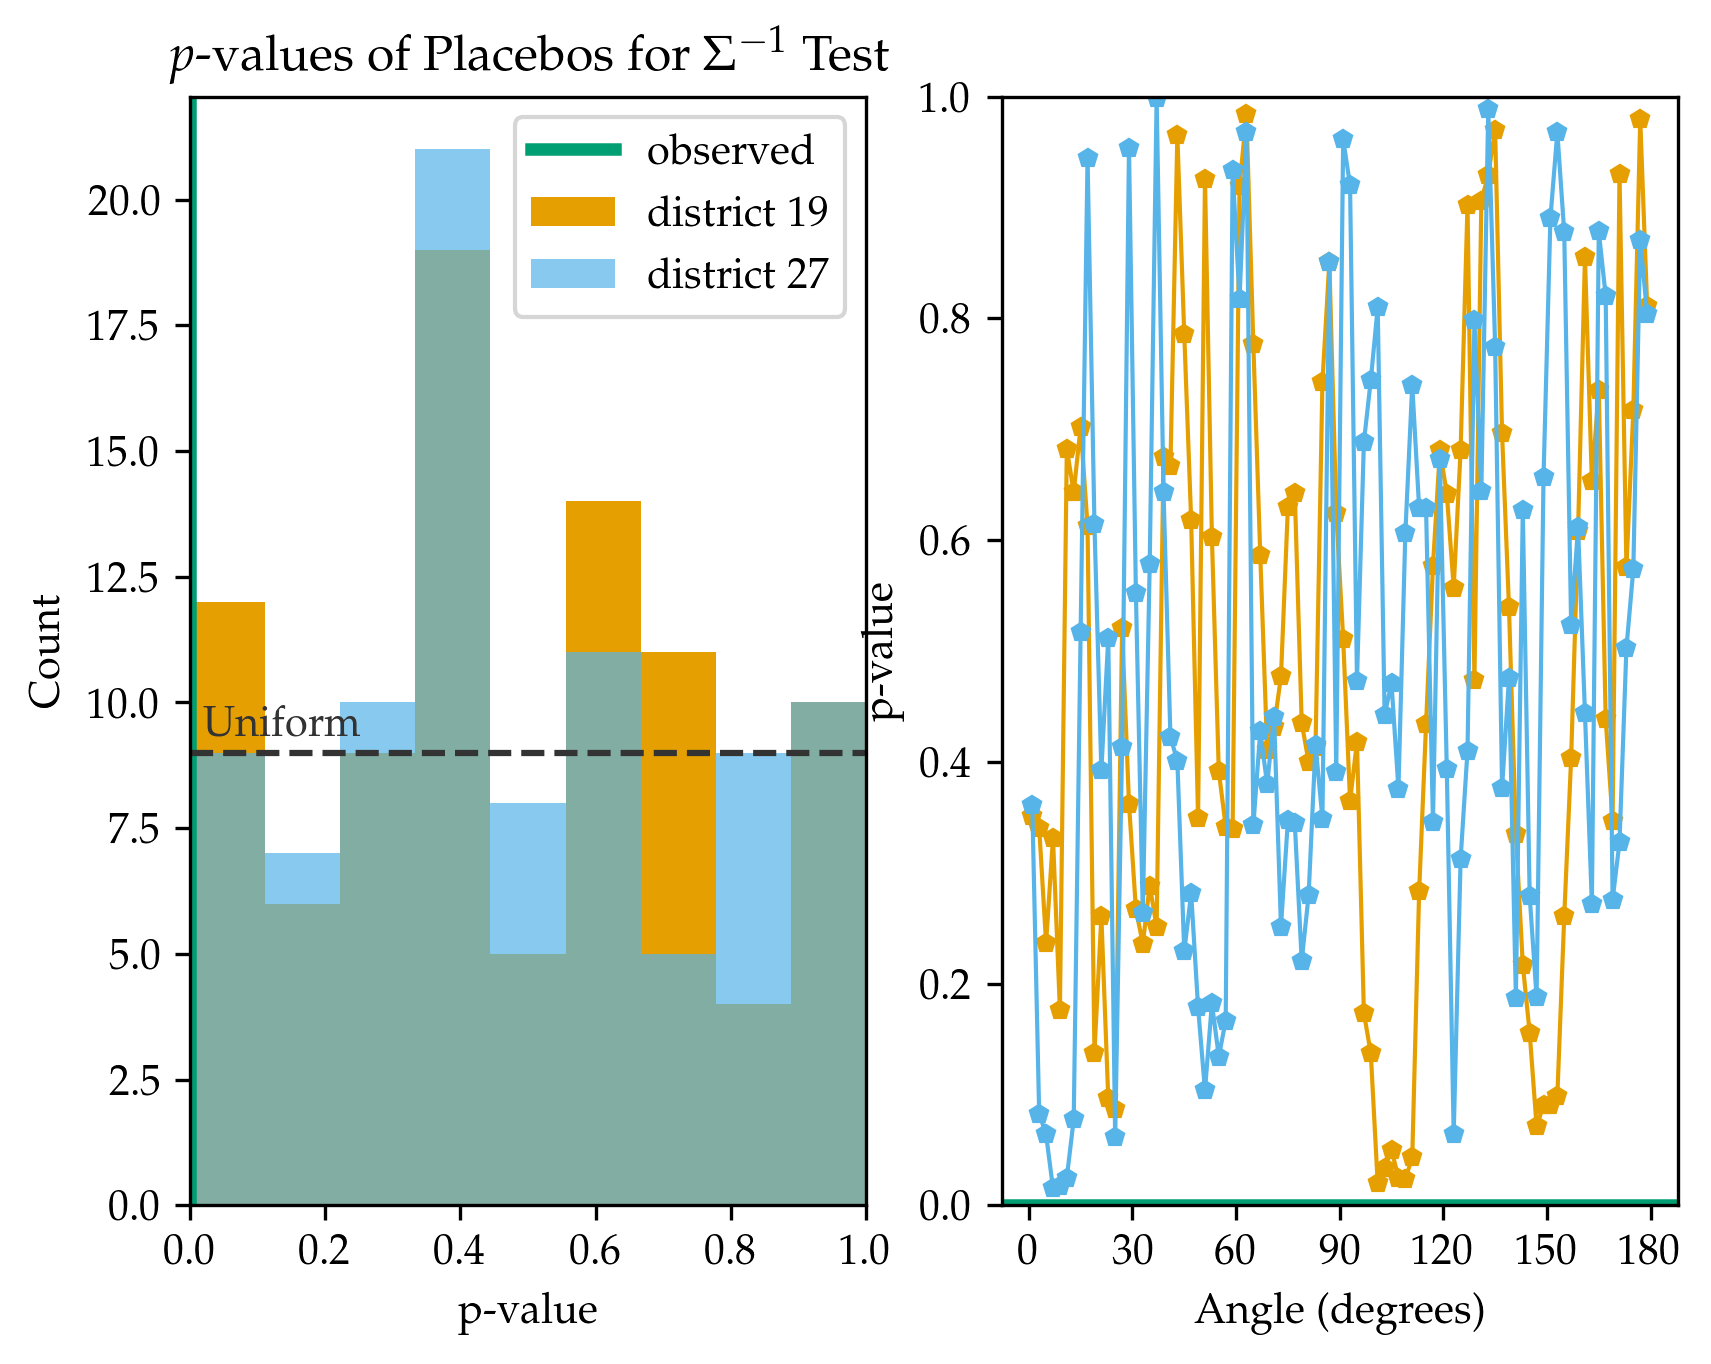

In [143]:
plot_placebo_pval(placebo_invvar_A, placebo_invvar_B, pval_invvar_calib_multi, 
    L"$p$-values of Placebos for $\Sigma^{-1}$ Test")

plt.savefig("NYC_plots/placebo_invvar.png")
plt.savefig("NYC_plots/placebo_invvar.pdf")
;

### plot 3x2

In [145]:
function yaxis_right()
    ax = plt.gca()
    ax[:yaxis][:tick_right]()
    ax[:yaxis][:set_label_position]("right")
end
function title_in_axis(s)
    plt.text(0.05, 0.95,s,
         horizontalalignment="left",
         verticalalignment="top",
         transform = plt.gca()[:transAxes])
end
function hide_xaxis()
    plt.gca()[:xaxis][:set_ticklabels]([])
    plt.xlabel("")
end

hide_xaxis (generic function with 1 method)

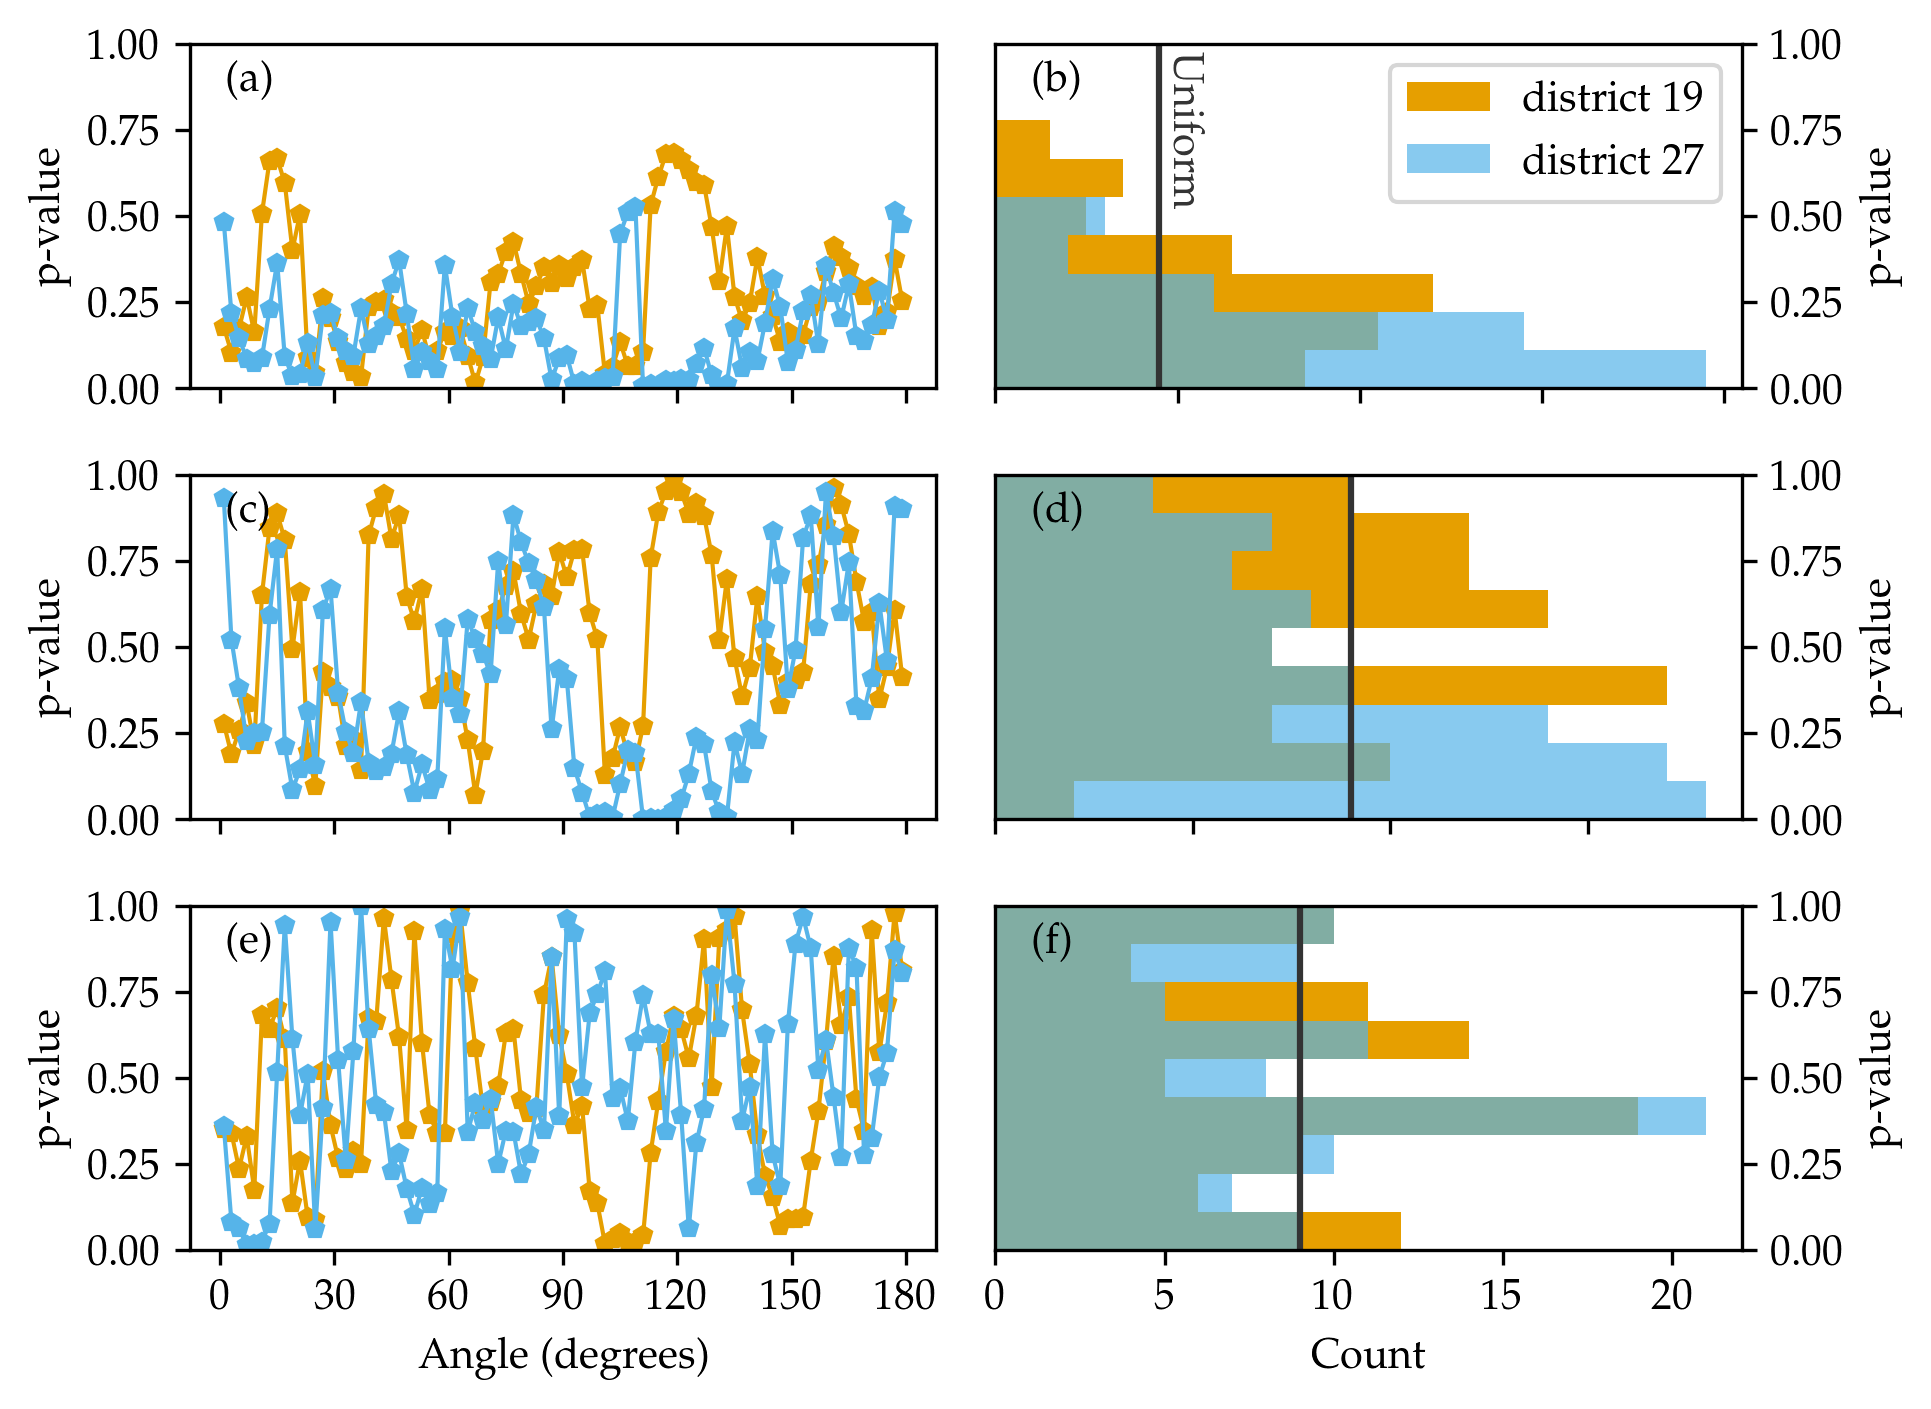

In [146]:
plt.subplot(3,2,1)
plot_placebo_pval_trace(placebo_mll_A, placebo_mll_B, pval_mll_multi; plot_obs=false)
hide_xaxis()
title_in_axis("(a)")
plt.subplot(3,2,2)
plot_placebo_pval_horiz_hist(placebo_mll_A, placebo_mll_B, pval_mll_multi; plot_obs=false, label_unif=true)
plt.legend(loc="upper right")
yaxis_right()
hide_xaxis()
title_in_axis("(b)")

plt.subplot(3,2,3)
plot_placebo_pval_trace(placebo_chi_A, placebo_chi_B, chi2_boot_pval_multi; plot_obs=false)
hide_xaxis()
title_in_axis("(c)")
plt.subplot(3,2,4)
plot_placebo_pval_horiz_hist(placebo_chi_A, placebo_chi_B, chi2_boot_pval_multi; plot_obs=false, label_unif=false)
yaxis_right()
hide_xaxis()
title_in_axis("(d)")

plt.subplot(3,2,5)
plot_placebo_pval_trace(placebo_invvar_A, placebo_invvar_B, pval_invvar_calib_multi; plot_obs=false)
title_in_axis("(e)")
plt.subplot(3,2,6)
plot_placebo_pval_horiz_hist(placebo_invvar_A, placebo_invvar_B, pval_invvar_calib_multi; plot_obs=false, label_unif=false)
yaxis_right()
title_in_axis("(f)")

plt.gcf()[:tight_layout]()

plt.savefig("./NYC_plots/NYC_placebos.png", bbox_inches="tight")
plt.savefig("./NYC_plots/NYC_placebos.pdf", bbox_inches="tight")

## Pairwise treatment effect (multi)

In [72]:
function get_τpost(gp_i::GPE, gp_j::GPE, sentinelX::Matrix)
    μ, Σ = GeoRDD.cliff_face(gp_i, gp_j, sentinelX)
    τpost = GeoRDD.inverse_variance(μ, Σ)
    return τpost
end 

get_τpost (generic function with 1 method)

In [73]:
τpost_pairs = Dict{Tuple{String,String},Normal}()
for (distrA,distrB) in keys(sentinels)
    X◫ = hcat(sentinels[distrA,distrB].coordinates...)
    τpost = get_τpost(resid_GP_dict_multi[distrA], resid_GP_dict_multi[distrB], X◫)
    τpost_pairs[distrA,distrB] = τpost
end

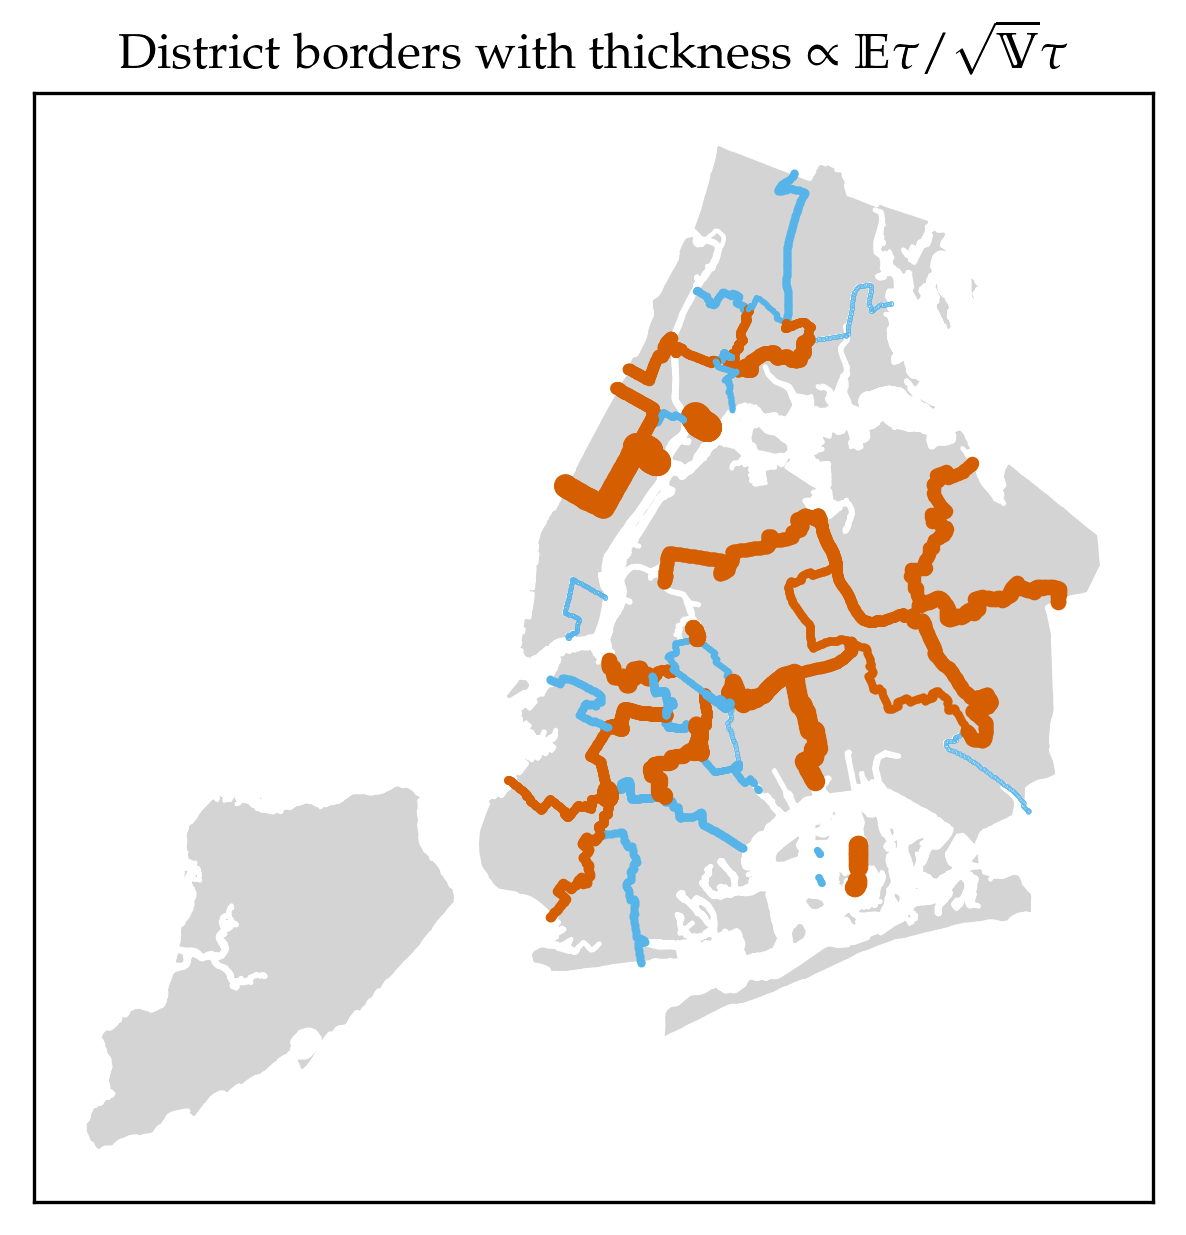

In [144]:
function plot_all_pairs()
   NYC_prepare_plots.background_schdistrs(
            plt.gca(), 
            color="#AAAAAA", 
            edgecolor="white", 
            linestyle="-")
    for distr_pair in keys(sentinels)
        distrA, distrB = distr_pair
        if distrA > distrB
            continue
        end
        X◫ = hcat(sentinels[distr_pair].coordinates...)

        τpost = τpost_pairs[distr_pair]
        eff_size = abs(mean(τpost)) / std(τpost) * 2
        if eff_size > 2
            color="#D55E00"
        else
            color="#56B4E9"
        end
        plt.plot(X◫[1,:], X◫[2,:], marker=".", linestyle="", markersize=eff_size, color=color)
    end
    ax = plt.gca()
    ax[:set_aspect]("equal")
    ax[:get_xaxis]()[:set_ticks]([])
    ax[:get_yaxis]()[:set_ticks]([])
    plt.title(L"District borders with thickness $\propto \mathbb{E}\tau/{\sqrt\mathbb{V}\tau}$ ")
end

plt.plt[:interactive](false)
plot_all_pairs()
plt.savefig("NYC_plots/pairwise_multi.png")
plt.savefig("NYC_plots/pairwise_multi.pdf")
;

![districts](NYC_plots/NYC_school_performances_croppped.png)

There isn't a clear trend in treatment effects getting stronger or weaker when we go from fitting the hyperparameters on a single district to multiple districts in Brooklyn and Queens. However, it does appear that treatment effects involving districts that were included in the hyperparameter fitting go down, whereas they go up in Manhattan.

One possible explanation is that some tax and building classes only appear in Manhattan, so that when we fit the linear regression parameters, those classes are given a coefficient of zero (no data, so the posterior mean is zero).